# ML - Это база)

## Feature Engineering: "искусство превращать свинец в золото" .... или ***но в данные

Теперь перейдем к важнейшей теме в машинном обучении - созданию новых признаков.



In [80]:
# Импортируем необходимые библиотеки для Feature Engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

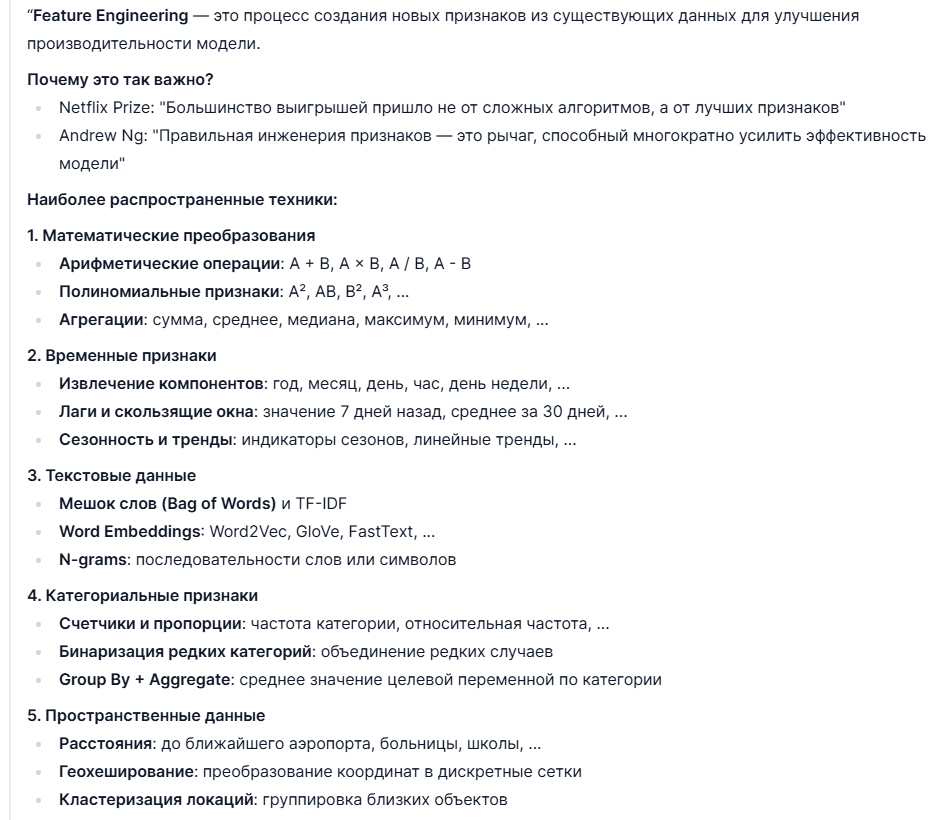

#### Принципы эффективной инженерии признаков: 



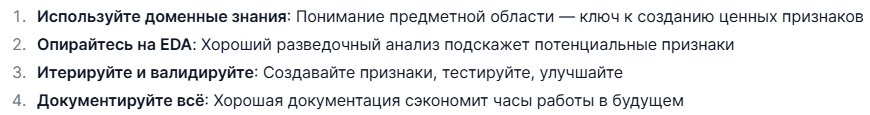

Давайте теперь посмотрим практические примеры Feature Engineering:



### Что дает Feature Engineering

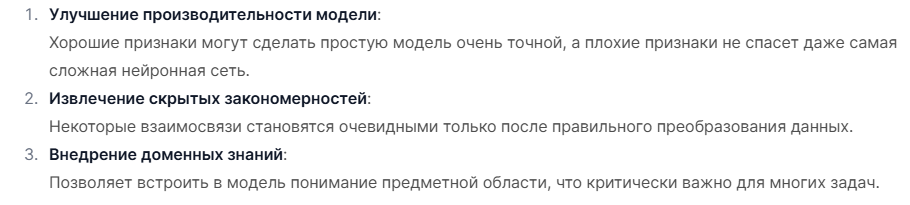

#### 1. Математические преобразования

In [83]:
# Отношения
df['ROOMS_PER_PERSON'] = df['AveRooms'] / df['AveOccup']
df['BEDROOMS_RATIO'] = df['AveBedrms'] / df['AveRooms']

###### Эти новые признаки интуитивно понятны:

    ROOMS_PER_PERSON: сколько комнат приходится на одного человека (мера просторности жилья)
    BEDROOMS_RATIO: какая доля комнат используется как спальни (характеристика планировки)

In [ ]:
# Полиномиальные признаки
poly_features = poly.fit_transform(df[['MedInc', 'HouseAge']])

###### Здесь мы создаем:

    MedInc²: зависимость цены от дохода может быть нелинейной
    MedInc × HouseAge: взаимодействие дохода и возраста дома
    HouseAge²: нелинейное влияние возраста дома

#### 2. Географические признаки

In [ ]:
# Расстояния до крупных городов
for city, (lon, lat) in cities.items():
    df[f'DISTANCE_TO_{city}'] = np.sqrt(
        (df['Longitude'] - lon)**2 + (df['Latitude'] - lat)**2
    )

Близость к центрам занятости и культуры прямо влияет на стоимость недвижимости. Вычисление расстояния до ключевых локаций - мощный признак для модели.



In [85]:
# Бинарный признак близости к побережью
df['IS_COASTAL'] = (df['Longitude'] < -121.5).astype(int)

Прибрежные районы в Калифорнии обычно дороже, и этот бинарный признак помогает модели это уловить.



#### 3. Дискретизация и бинаризация


In [87]:
# Дискретизация по квантилям
df['INCOME_CATEGORY'] = pd.qcut(df['MedInc'], q=5, labels=False)

Иногда сырые числовые значения менее информативны, чем диапазоны. Разбивая доход на 5 категорий, мы помогаем модели видеть структуру в данных.



In [ ]:
# Бинаризация
df['HIGH_INCOME'] = (df['MedInc'] > df['MedInc'].median()).astype(int)

Простой бинарный признак "высокий/низкий доход" может быть удивительно полезным для модели.



#### 4. Взаимодействия признаков


In [88]:
df['INCOME_AGE_INTERACTION'] = df['MedInc'] * df['HouseAge']

Это позволяет модели "понять", что влияние дохода может отличаться для новых и старых домов.



#### Оценка эффективности


In [ ]:
# Функция для оценки модели с разными наборами признаков
def evaluate_feature_sets(X_sets, y, model=LinearRegression(), cv=5):
    results = []
    for name, X in X_sets.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
        results.append({
            'Feature Set': name,
            'Mean R²': scores.mean(),
            'Std R²': scores.std()
        })
    return pd.DataFrame(results)

#### Соеденим и запустим

Исходный датасет с правильными именами столбцов:
Имена столбцов: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422


После базовых математических преобразований:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  ROOMS_PER_PERSON  BEDROOMS_RATIO  \
0    -122.23  4.526          2.732919        0.146591   
1    -122.22  3.585          2.956685        0.155797   
2    -122.24  3.521          2.957661        0.129516   
3    -122.25  3.413          2.283154        0.184458   
4    -122.25  3.422          2.879646        0.172096   

   POPULATION_PER_HOUSEHOLD   MedInc^2  MedInc HouseAge  HouseAge^2  
0                     126.0  69.308955         341.3332      1681.0  
1                    1138.0  68.913242         174.3294       441.0  
2                     177.0  52.669855         377.3848      2704.0  
3                     219.0  31.844578         293.4412      2704.0  
4                     259.0  14.793254         200.0024      2704.0


После добавления географических признаков:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  ROOMS_PER_PERSON  BEDROOMS_RATIO  \
0    -122.23  4.526          2.732919        0.146591   
1    -122.22  3.585          2.956685        0.155797   
2    -122.24  3.521          2.957661        0.129516   
3    -122.25  3.413          2.283154        0.184458   
4    -122.25  3.422          2.879646        0.172096   

   POPULATION_PER_HOUSEHOLD   MedInc^2  MedInc HouseAge  HouseAge^2  \
0                     126.0  69.308955         341.3332      1681.0   
1                    1138.0  68.913242         174.3294       441.0   
2                     177.0  52.669855         377.3848      2704.0   
3                     219.0  31.844578         293.4412      2704.0   
4                     259.0  14.793254         200.0024      2704.0   

   DISTANCE_TO_LA  DISTANCE_TO_SF  DISTANCE_TO_SD  IS_COASTAL  
0        5.530732        0.219545        7.233982           1  
1        5.509673        0.219317        7.212711           1  
2        5.517246        0.196977        7.219647           1  
3        5.524500        0.187883        7.226687           1  
4        5.524500        0.187883        7.226687           1


После дискретизации признаков:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  ROOMS_PER_PERSON  ...  MedInc HouseAge  HouseAge^2  \
0    -122.23  4.526          2.732919  ...         341.3332      1681.0   
1    -122.22  3.585          2.956685  ...         174.3294       441.0   
2    -122.24  3.521          2.957661  ...         377.3848      2704.0   
3    -122.25  3.413          2.283154  ...         293.4412      2704.0   
4    -122.25  3.422          2.879646  ...         200.0024      2704.0   

   DISTANCE_TO_LA  DISTANCE_TO_SF  DISTANCE_TO_SD  IS_COASTAL  \
0        5.530732        0.219545        7.233982           1   
1        5.509673        0.219317        7.212711           1   
2        5.517246        0.196977        7.219647           1   
3        5.524500        0.187883        7.226687           1   
4        5.524500        0.187883        7.226687           1   

   INCOME_CATEGORY  AGE_CATEGORY  HIGH_INCOME  OLD_HOUSES  
0                4             3            1           1  
1                4             1            1           0  
2                4             4            1           1  
3                4             4            1           1  
4                2             4            1           1  

[5 rows x 23 columns]


После добавления взаимодействий:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  ROOMS_PER_PERSON  ...  DISTANCE_TO_LA  DISTANCE_TO_SF  \
0    -122.23  4.526          2.732919  ...        5.530732        0.219545   
1    -122.22  3.585          2.956685  ...        5.509673        0.219317   
2    -122.24  3.521          2.957661  ...        5.517246        0.196977   
3    -122.25  3.413          2.283154  ...        5.524500        0.187883   
4    -122.25  3.422          2.879646  ...        5.524500        0.187883   

   DISTANCE_TO_SD  IS_COASTAL  INCOME_CATEGORY  AGE_CATEGORY  HIGH_INCOME  \
0        7.233982           1                4             3            1   
1        7.212711           1                4             1            1   
2        7.219647           1                4             4            1   
3        7.226687           1                4             4            1   
4        7.226687           1                2             4            1   

   OLD_HOUSES  INCOME_AGE_INTERACTION  INCOME_AGE_GROUP  
0           1                341.3332               4_3  
1           0                174.3294               4_1  
2           1                377.3848               4_4  
3           1                293.4412               4_4  
4           1                200.0024               2_4  

[5 rows x 25 columns]


Влияние разных наборов признаков на качество модели:


Feature Set   Mean R²    Std R²
0     Только исходные  0.553031  0.061692
1       С отношениями  0.614045  0.044762
2   С полиномиальными  0.558915  0.059898
3   С географическими  0.551284  0.058948
4  Все новые признаки  0.624159  0.037055

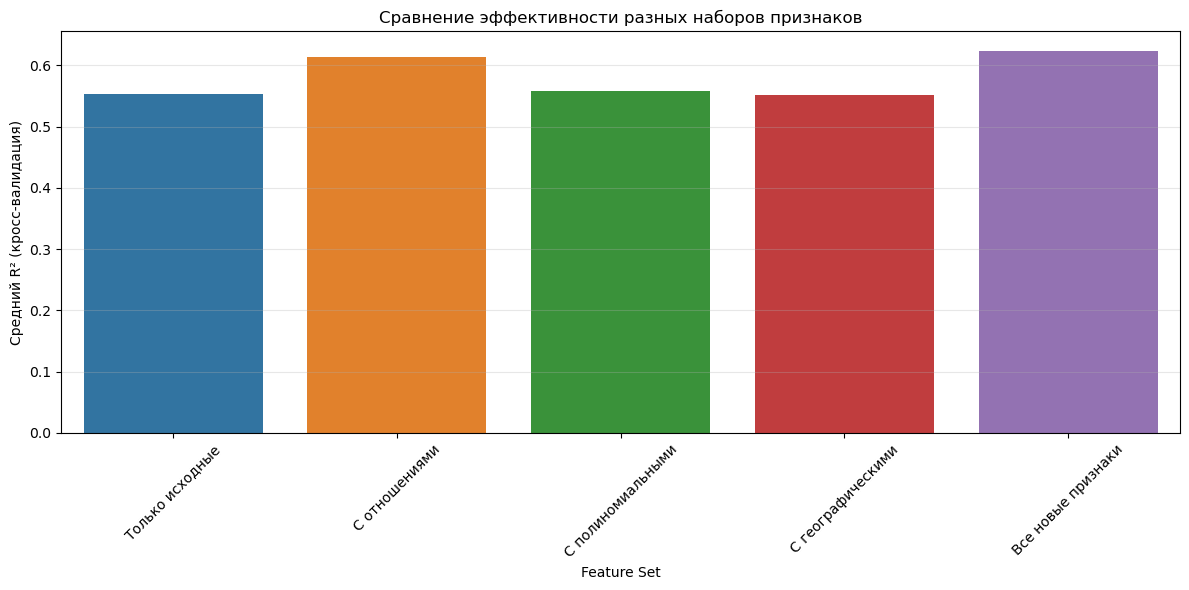

In [91]:
# Практические примеры Feature Engineering (исправленная полная версия)

# Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Используем датасет Калифорнийского жилья
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

print("Исходный датасет с правильными именами столбцов:")
print(f"Имена столбцов: {housing.feature_names}")
display(df.head())

# 1. Создание базовых математических признаков

# 1.1 Арифметические операции (исправлено)
df['ROOMS_PER_PERSON'] = df['AveRooms'] / df['AveOccup']
df['BEDROOMS_RATIO'] = df['AveBedrms'] / df['AveRooms']
df['POPULATION_PER_HOUSEHOLD'] = df['Population'] / df['AveOccup']

# 1.2 Полиномиальные признаки
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['MedInc', 'HouseAge']])

# Создаем имена для новых признаков
original_features = ['MedInc', 'HouseAge']
poly_feature_names = []
for i, feat_name in enumerate(poly.get_feature_names_out(original_features)):
    if i >= len(original_features):  # Пропускаем исходные признаки
        poly_feature_names.append(feat_name)

# Добавляем полиномиальные признаки в датафрейм
df_poly = pd.DataFrame(poly_features[:, len(original_features):], columns=poly_feature_names)
df = pd.concat([df, df_poly], axis=1)

print("\nПосле базовых математических преобразований:")
display(df.head())

# 2. Создание признаков на основе географии

# 2.1 Расстояние до экономических центров
# Координаты некоторых крупных городов Калифорнии
cities = {
    'LA': (-118.24, 34.05),
    'SF': (-122.42, 37.77),
    'SD': (-117.16, 32.72)
}

# Вычисляем расстояния до каждого города
for city, (lon, lat) in cities.items():
    df[f'DISTANCE_TO_{city}'] = np.sqrt(
        (df['Longitude'] - lon)**2 + (df['Latitude'] - lat)**2
    )

# 2.2 Является ли район прибрежным (грубая аппроксимация для Калифорнии)
df['IS_COASTAL'] = (df['Longitude'] < -121.5).astype(int)

print("\nПосле добавления географических признаков:")
display(df.head())

# 3. Дискретизация непрерывных признаков

# 3.1 Дискретизация по квантилям
df['INCOME_CATEGORY'] = pd.qcut(df['MedInc'], q=5, labels=False)

# 3.2 Дискретизация по равным интервалам
df['AGE_CATEGORY'] = pd.cut(df['HouseAge'], bins=5, labels=False)

# 3.3 Бинаризация
df['HIGH_INCOME'] = (df['MedInc'] > df['MedInc'].median()).astype(int)
df['OLD_HOUSES'] = (df['HouseAge'] > 30).astype(int)

print("\nПосле дискретизации признаков:")
display(df.head())

# 4. Взаимодействия признаков

# 4.1 Взаимодействия между числовыми признаками
df['INCOME_AGE_INTERACTION'] = df['MedInc'] * df['HouseAge']

# 4.2 Взаимодействия между категориальными признаками
# Теперь AGE_CATEGORY должен существовать
df['INCOME_AGE_GROUP'] = df['INCOME_CATEGORY'].astype(str) + "_" + df['AGE_CATEGORY'].astype(str)

print("\nПосле добавления взаимодействий:")
display(df.head())

# 5. Оценка влияния новых признаков на качество модели

# Функция для оценки модели с разными наборами признаков
def evaluate_feature_sets(X_sets, y, model=LinearRegression(), cv=5):
    results = []
    for name, X in X_sets.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
        results.append({
            'Feature Set': name,
            'Mean R²': scores.mean(),
            'Std R²': scores.std()
        })
    return pd.DataFrame(results)

# Определим разные наборы признаков
feature_sets = {
    'Только исходные': df[housing.feature_names],
    'С отношениями': df[list(housing.feature_names) + ['ROOMS_PER_PERSON', 'BEDROOMS_RATIO', 'POPULATION_PER_HOUSEHOLD']],
    'С полиномиальными': df[list(housing.feature_names) + list(df_poly.columns)],
    'С географическими': df[list(housing.feature_names) + [col for col in df.columns if 'DISTANCE_TO_' in col or col == 'IS_COASTAL']],
    'Все новые признаки': df[[col for col in df.columns if col != 'PRICE' and col not in ['INCOME_AGE_GROUP']]]
}

# Оцениваем влияние разных наборов признаков
evaluation_results = evaluate_feature_sets(feature_sets, df['PRICE'])
print("\nВлияние разных наборов признаков на качество модели:")
display(evaluation_results)

# Визуализация результатов
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature Set', y='Mean R²', data=evaluation_results)
plt.title('Сравнение эффективности разных наборов признаков')
plt.ylabel('Средний R² (кросс-валидация)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### Feature Engineering показывает, как творческий подход к данным может улучшить модель. Вместо усложнения самой модели (что часто приводит к переобучению), мы делаем акцент на создании лучших входных данных.



# Часть 3: Классические алгоритмы

Переходим к одной из самых важных частей нашей лекции - непосредственно знакомству с классическими алгоритмами машинного обучения.

## Регрессия: предсказываем числа

In [99]:
# Импортируем необходимые библиотеки для регрессионных моделей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

##### Что такое регрессия?


###### Это метод предсказания численных значений на основе входных данных.

Примеры задач регрессии:

    Предсказание цен на недвижимость
    Прогнозирование продаж
    Оценка времени доставки
    Предсказание температуры

###### Классические регрессионные модели:



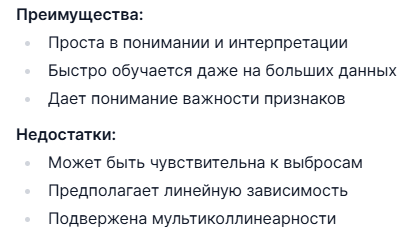

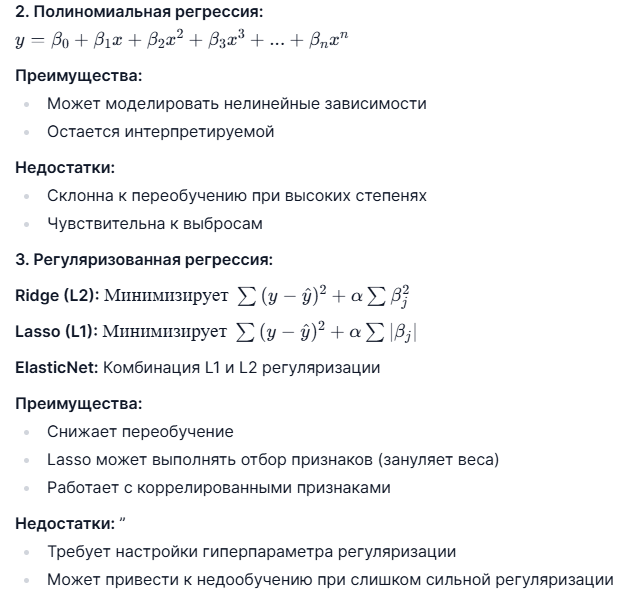

Линейная регрессия:
MSE: 0.5559
R²: 0.5758
Коэффициенты:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337
Свободный член: -37.0233


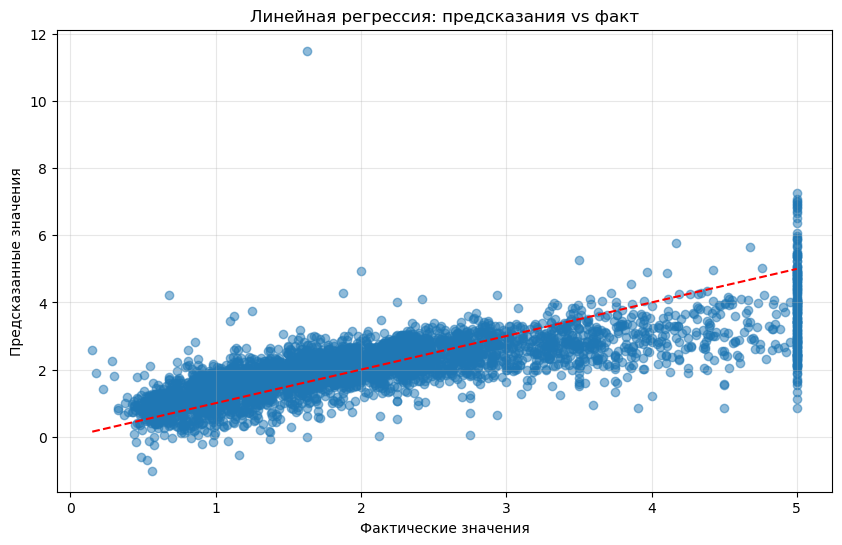


Полиномиальная регрессия степени 1:
R² на обучающей выборке: 0.0001
R² на тестовой выборке: -0.0004

Полиномиальная регрессия степени 2:
R² на обучающей выборке: 0.0002
R² на тестовой выборке: -0.0006

Полиномиальная регрессия степени 5:
R² на обучающей выборке: 0.0021
R² на тестовой выборке: -0.0007

Полиномиальная регрессия степени 10:
R² на обучающей выборке: -0.0523
R² на тестовой выборке: -0.4142


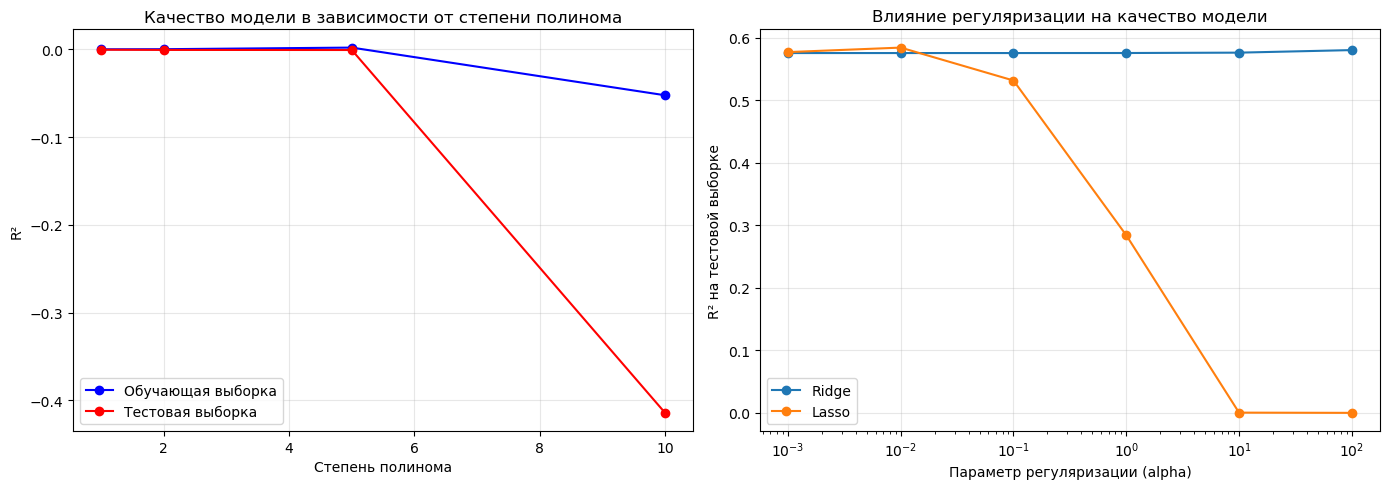

<Figure size 1200x800 with 0 Axes>

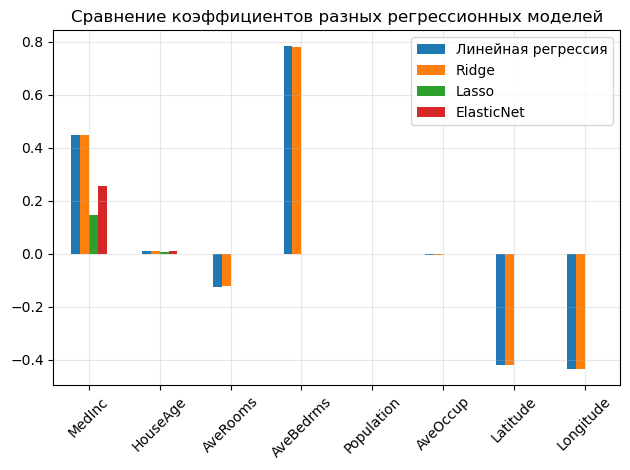

In [96]:
# Используем датасет California Housing
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем DataFrame для удобства
df = pd.DataFrame(X, columns=housing.feature_names)
df['PRICE'] = y

# 1. Линейная регрессия
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Оценка качества
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Линейная регрессия:")
print(f"MSE: {mse_linear:.4f}")
print(f"R²: {r2_linear:.4f}")
print("Коэффициенты:")
for feature, coef in zip(housing.feature_names, linear_reg.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Свободный член: {linear_reg.intercept_:.4f}")

# Визуализация предсказаний линейной регрессии
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия: предсказания vs факт')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Полиномиальная регрессия
# Для наглядности выберем всего 2 признака
X_simple = df[['MedInc', 'AveRooms']].values

degrees = [1, 2, 5, 10]  # Разные степени полинома
colors = ['blue', 'green', 'red', 'purple']
train_scores = []
test_scores = []

plt.figure(figsize=(14, 5))

# График с предсказаниями разных полиномиальных моделей
for i, degree in enumerate(degrees):
    # Создаем полиномиальные признаки
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly.fit_transform(X_simple[:len(X_train)])
    X_poly_test = poly.transform(X_simple[len(X_train):])
    
    # Обучаем модель
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)
    
    # Оцениваем на обучающей и тестовой выборке
    train_score = r2_score(y_train, poly_reg.predict(X_poly_train))
    test_score = r2_score(y_test, poly_reg.predict(X_poly_test))
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"\nПолиномиальная регрессия степени {degree}:")
    print(f"R² на обучающей выборке: {train_score:.4f}")
    print(f"R² на тестовой выборке: {test_score:.4f}")

# Визуализация зависимости качества от степени полинома
plt.subplot(1, 2, 1)
plt.plot(degrees, train_scores, 'o-', color='blue', label='Обучающая выборка')
plt.plot(degrees, test_scores, 'o-', color='red', label='Тестовая выборка')
plt.xlabel('Степень полинома')
plt.ylabel('R²')
plt.title('Качество модели в зависимости от степени полинома')
plt.grid(True, alpha=0.3)
plt.legend()

# 3. Регуляризация
# Ridge регрессия с разными альфа
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_scores.append(r2_score(y_test, ridge.predict(X_test)))

# Lasso регрессия с разными альфа
lasso_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_scores.append(r2_score(y_test, lasso.predict(X_test)))

# Визуализация влияния регуляризации
plt.subplot(1, 2, 2)
plt.semilogx(alphas, ridge_scores, 'o-', label='Ridge')
plt.semilogx(alphas, lasso_scores, 'o-', label='Lasso')
plt.xlabel('Параметр регуляризации (alpha)')
plt.ylabel('R² на тестовой выборке')
plt.title('Влияние регуляризации на качество модели')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Визуализация важности признаков (коэффициенты) для разных типов регуляризации
alpha_optimal = 1.0  # Выберем оптимальную альфу из предыдущего графика

models = {
    'Линейная регрессия': LinearRegression(),
    'Ridge': Ridge(alpha=alpha_optimal),
    'Lasso': Lasso(alpha=alpha_optimal),
    'ElasticNet': ElasticNet(alpha=alpha_optimal, l1_ratio=0.5)
}

# Обучаем модели и собираем коэффициенты
coefs = []
for name, model in models.items():
    model.fit(X_train, y_train)
    coefs.append(pd.Series(model.coef_, index=housing.feature_names, name=name))

# Визуализируем коэффициенты
coef_df = pd.concat(coefs, axis=1)
plt.figure(figsize=(12, 8))
coef_df.plot(kind='bar')
plt.grid(True, alpha=0.3)
plt.title('Сравнение коэффициентов разных регрессионных моделей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Классификация: раскладываем по коробкам

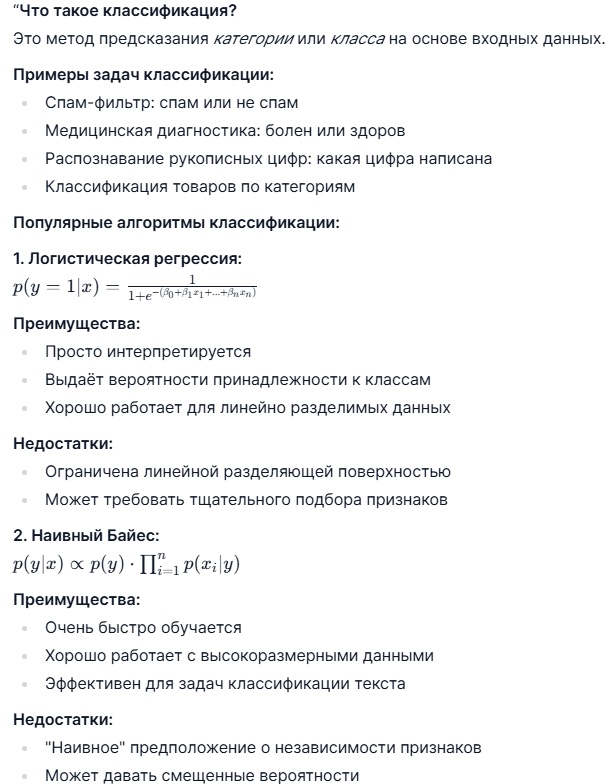

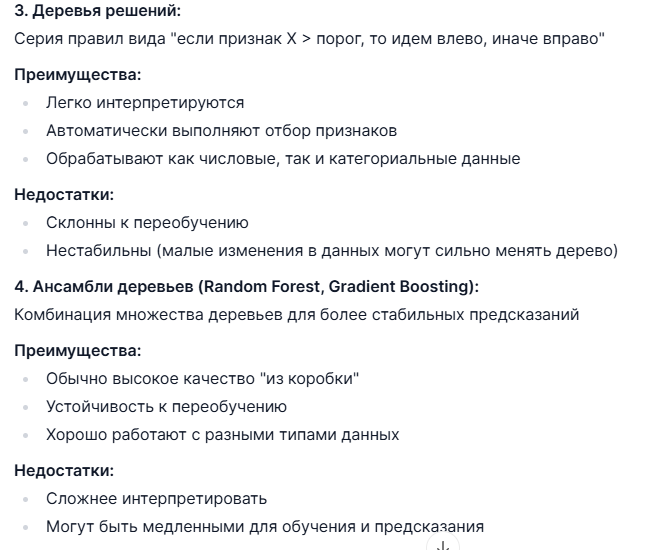

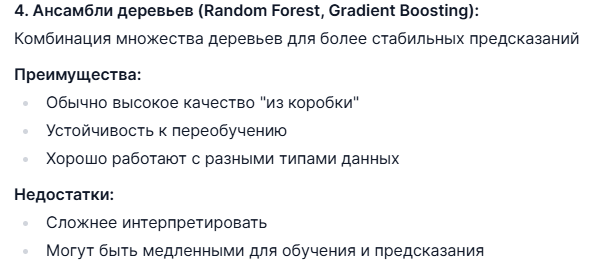

##### 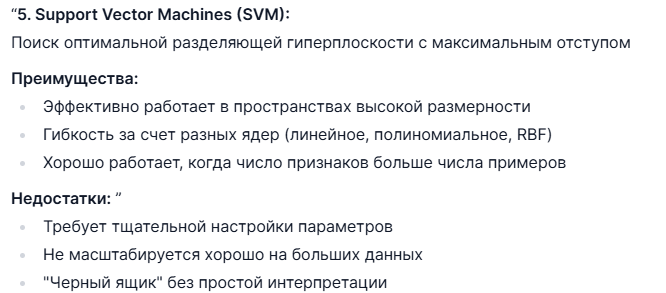

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Логистическая регрессия:
Accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Наивный Байес:
Accuracy: 0.9737
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Дерево решений:
Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg      

<Figure size 1200x600 with 0 Axes>

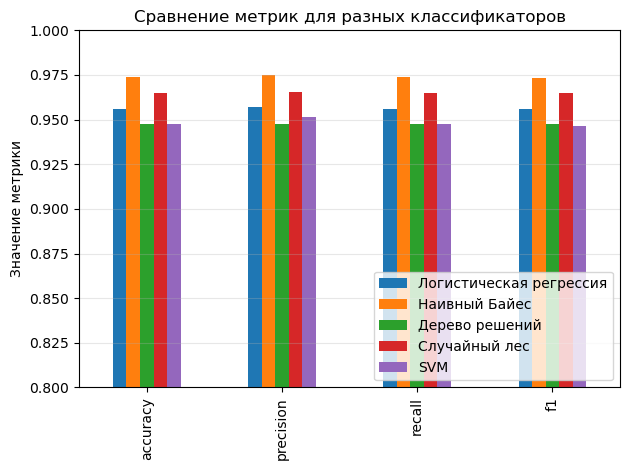

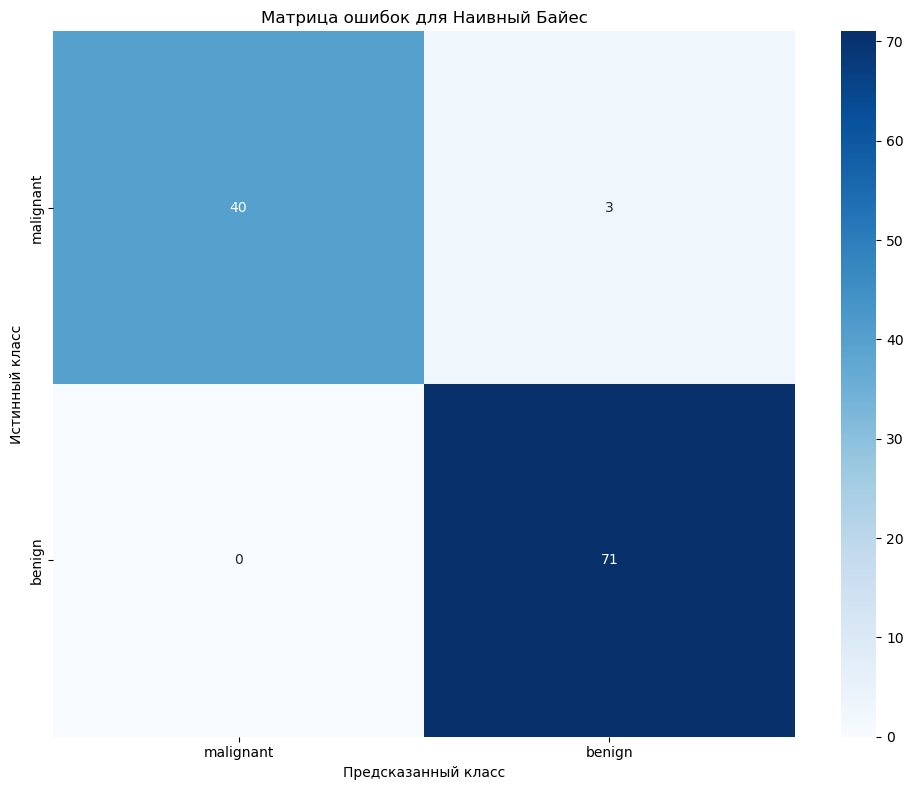

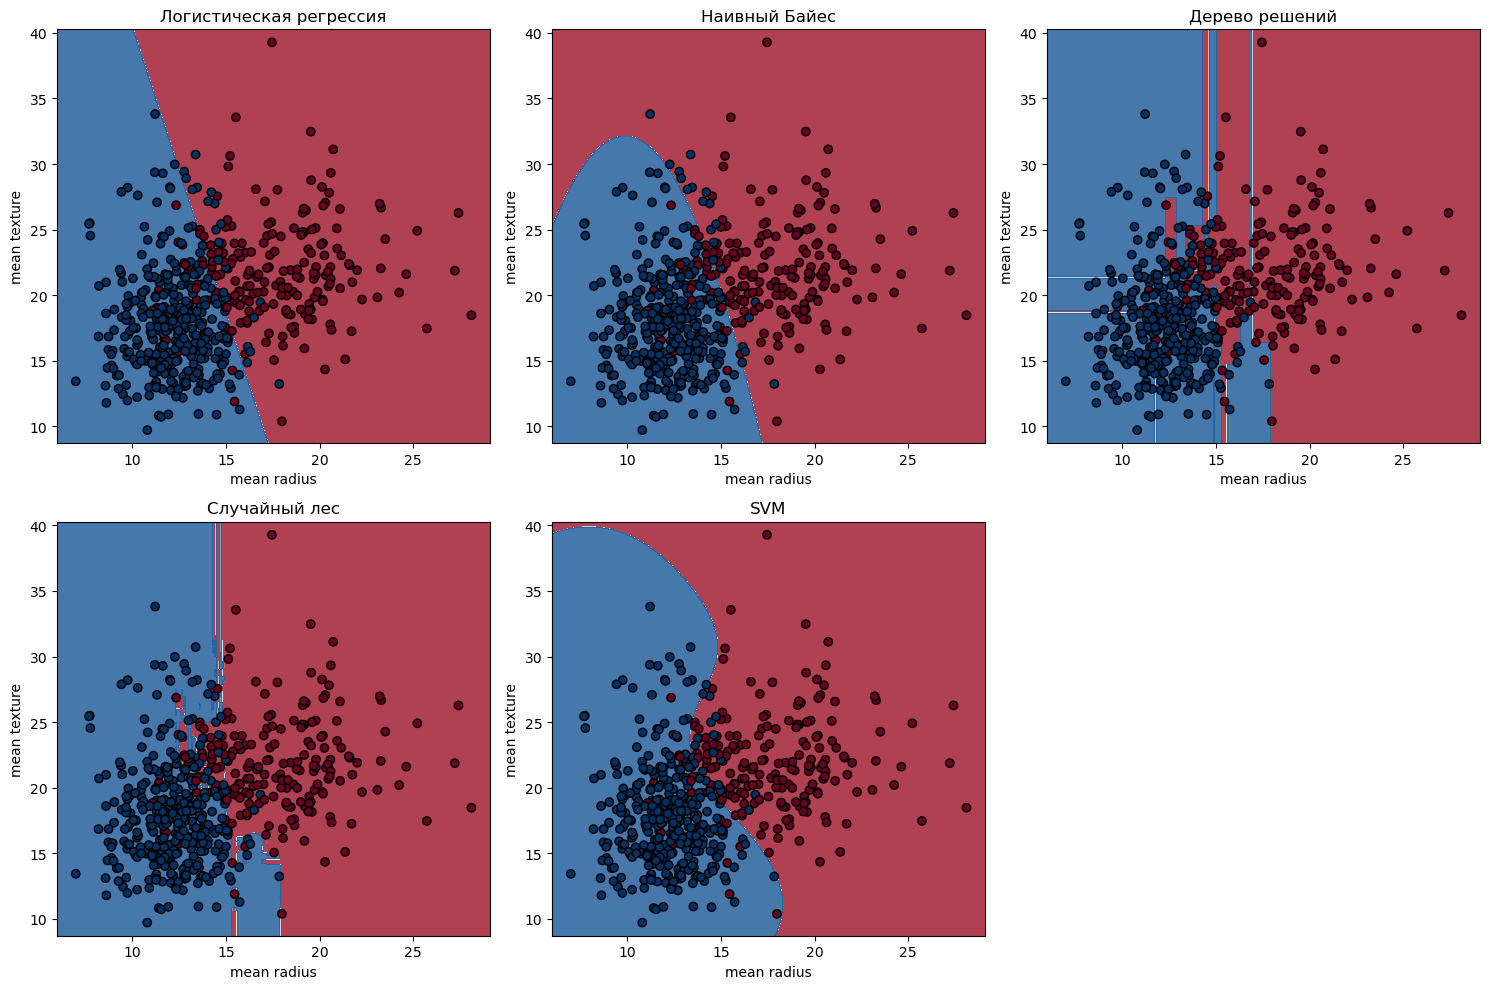

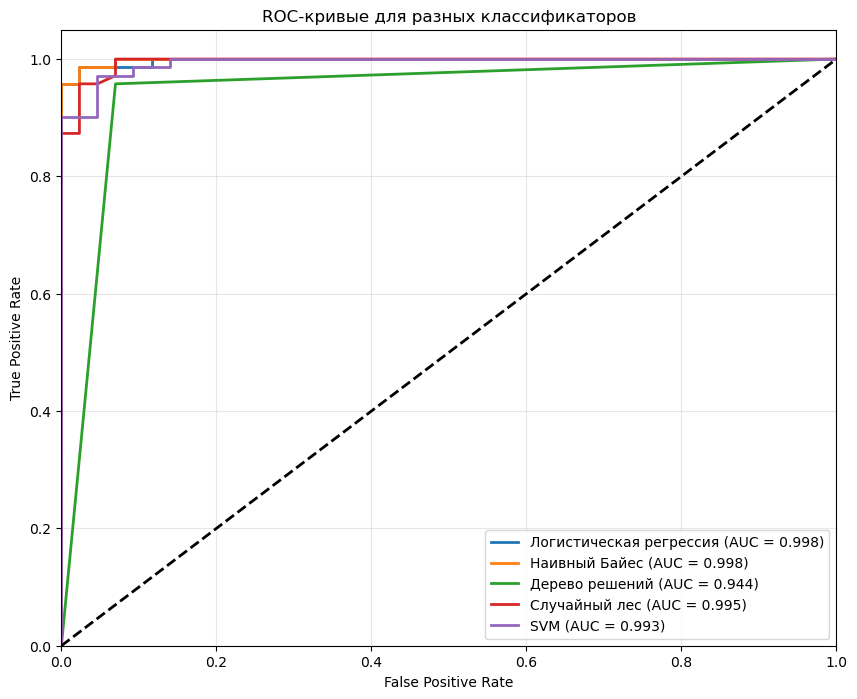

In [102]:
# Импортируем необходимые библиотеки для классификации
from sklearn.datasets import load_breast_cancer  # Добавляем этот импорт
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Загрузим датасет для классификации (рак груди)
data = load_breast_cancer()
X, y = data.data, data.target

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создадим словарь с различными классификаторами
classifiers = {
    'Логистическая регрессия': LogisticRegression(max_iter=1000, random_state=42),
    'Наивный Байес': GaussianNB(),
    'Дерево решений': DecisionTreeClassifier(random_state=42),
    'Случайный лес': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Обучим и оценим каждый классификатор
results = {}

for name, clf in classifiers.items():
    # Обучение
    clf.fit(X_train, y_train)
    
    # Предсказания
    y_pred = clf.predict(X_test)
    
    # Оценка
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Сохраняем результаты
    results[name] = {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1': report['weighted avg']['f1-score'],
        'model': clf,
        'predictions': y_pred
    }
    
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Визуализация сравнения моделей
metrics = ['accuracy', 'precision', 'recall', 'f1']
metrics_df = pd.DataFrame({name: [results[name][metric] for metric in metrics] 
                         for name in results.keys()}, index=metrics)

plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar')
plt.title('Сравнение метрик для разных классификаторов')
plt.ylabel('Значение метрики')
plt.ylim(0.8, 1.0)  # В этом датасете все модели обычно работают хорошо
plt.grid(axis='y', alpha=0.3)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Визуализация матрицы ошибок для лучшего классификатора
# Найдем лучший классификатор по accuracy
best_clf_name = max(results, key=lambda x: results[x]['accuracy'])
best_clf = results[best_clf_name]['model']
y_pred_best = results[best_clf_name]['predictions']

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title(f'Матрица ошибок для {best_clf_name}')
plt.tight_layout()
plt.show()

# Визуализация границ решения для 2D случая (для наглядности)
# Выберем 2 признака для визуализации
features = [0, 1]  # Первые два признака для простоты
X_2d = X[:, features]
X_2d_train, X_2d_test, y_2d_train, y_2d_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Создадим сетку для визуализации границ решения
def plot_decision_boundaries(classifiers, X, y, feature_names):
    h = .02  # шаг для сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    plt.figure(figsize=(15, 10))
    
    for i, (name, clf) in enumerate(classifiers.items()):
        # Переобучим модель только на двух признаках
        clf_2d = clone(clf)
        clf_2d.fit(X_2d_train, y_2d_train)
        
        # Визуализация границы решения
        ax = plt.subplot(2, 3, i + 1)
        
        # Предсказания для каждой точки сетки
        Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Отрисовка границы решения и точек
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)
        plt.xlabel(feature_names[features[0]])
        plt.ylabel(feature_names[features[1]])
        plt.title(name)
        
    plt.tight_layout()
    plt.show()

# Для правильного клонирования моделей
from sklearn.base import clone

# Визуализируем границы решения
plot_decision_boundaries(classifiers, X_2d, y, data.feature_names)

# Демонстрация ROC-кривых
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):
        # Для моделей, которые могут выдавать вероятности
        try:
            y_score = clf.predict_proba(X_test)[:, 1]
        except:
            # Для SVM с non-probability
            y_score = clf.decision_function(X_test)
            
        # Вычисляем ROC-кривую и AUC
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        
        # Отрисовка ROC-кривой
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для разных классификаторов')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

### оффтоп Как понять ROC-кривые 

Если вы погуглите ROC curve machine learning, то Википедия выдаст вам такой ответ: Кривая рабочих характеристик приёмника, или ROC-кривая, представляет собой график функции, который иллюстрирует диагностические возможности системы двоичного классификатора при изменении её порога распознавания.

Ещё одно частое описание ROC-кривой: ROC-кривая отражает чувствительность модели к разным порогам классификации. Новичков эти определения могут сбить с толку. Попробуем разобраться и развить представление о ROC-кривых.

https://habr.com/ru/companies/netologyru/articles/582756/

# Кластеризация: находим закономерности сами

In [103]:
# Импортируем необходимые библиотеки для кластеризации
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

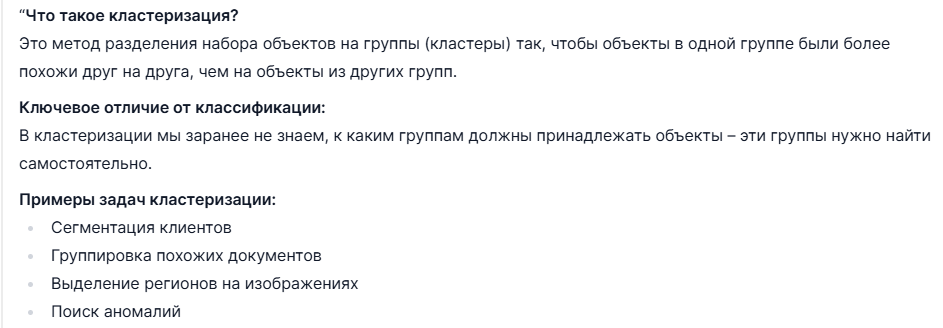

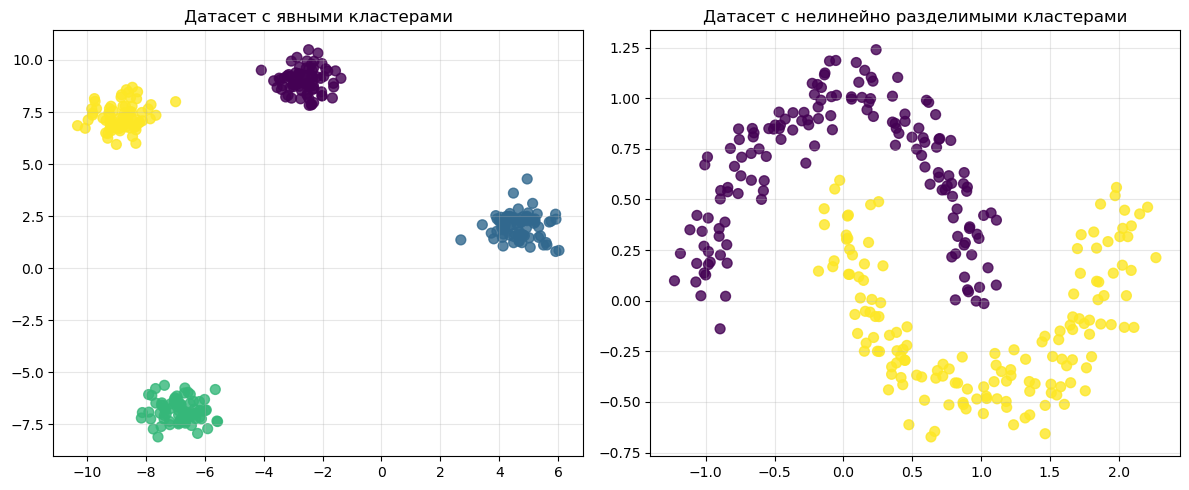

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


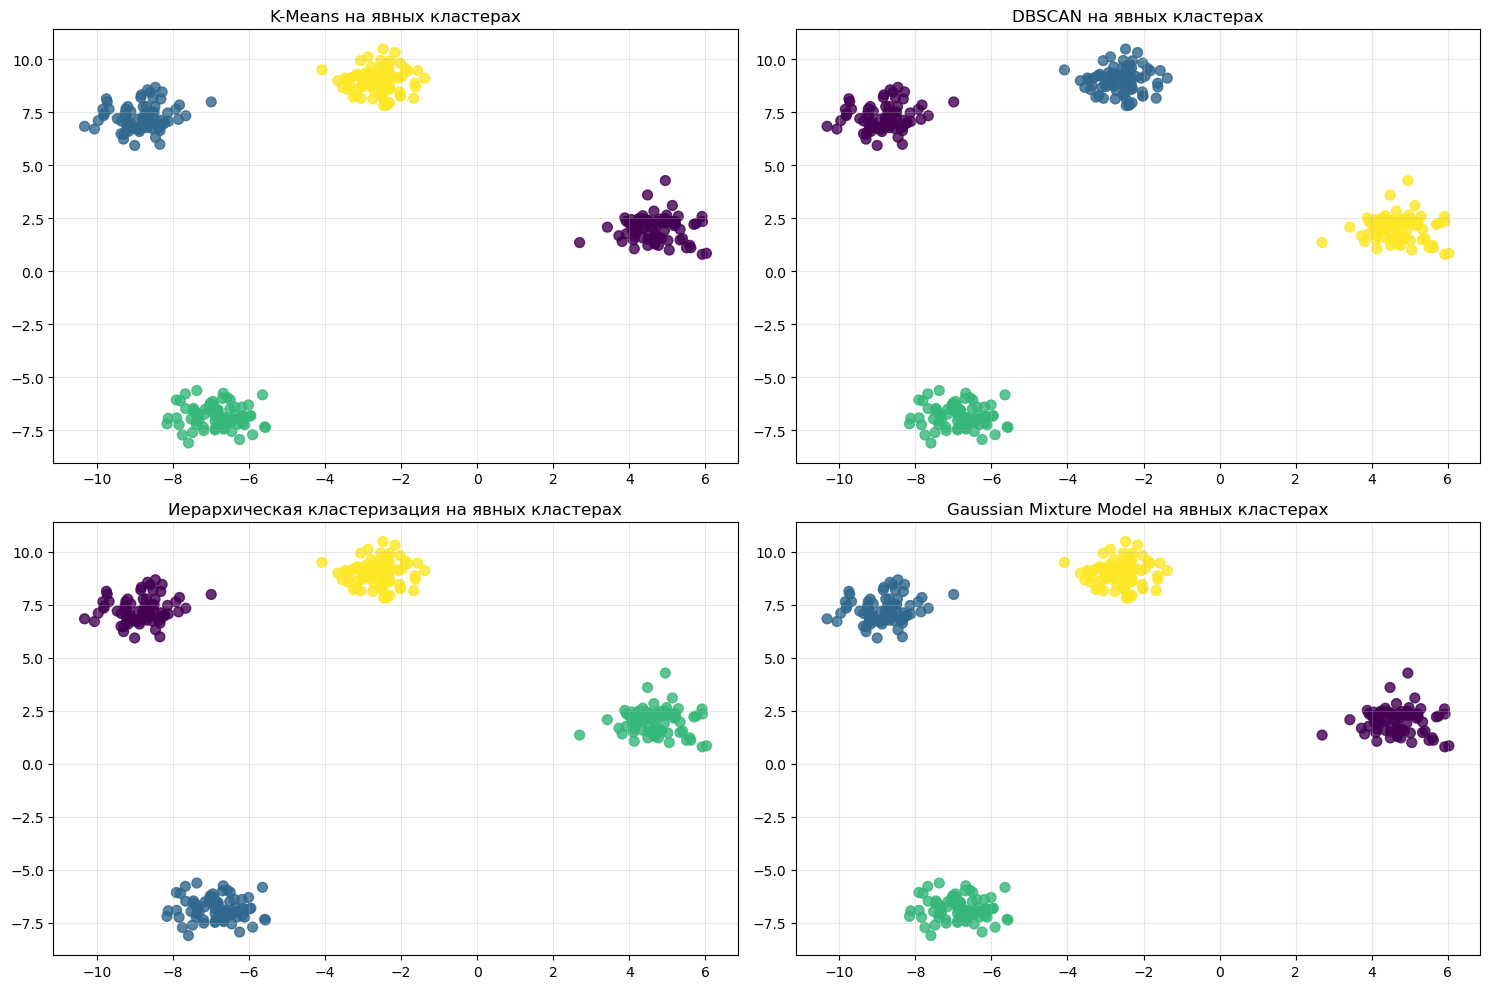

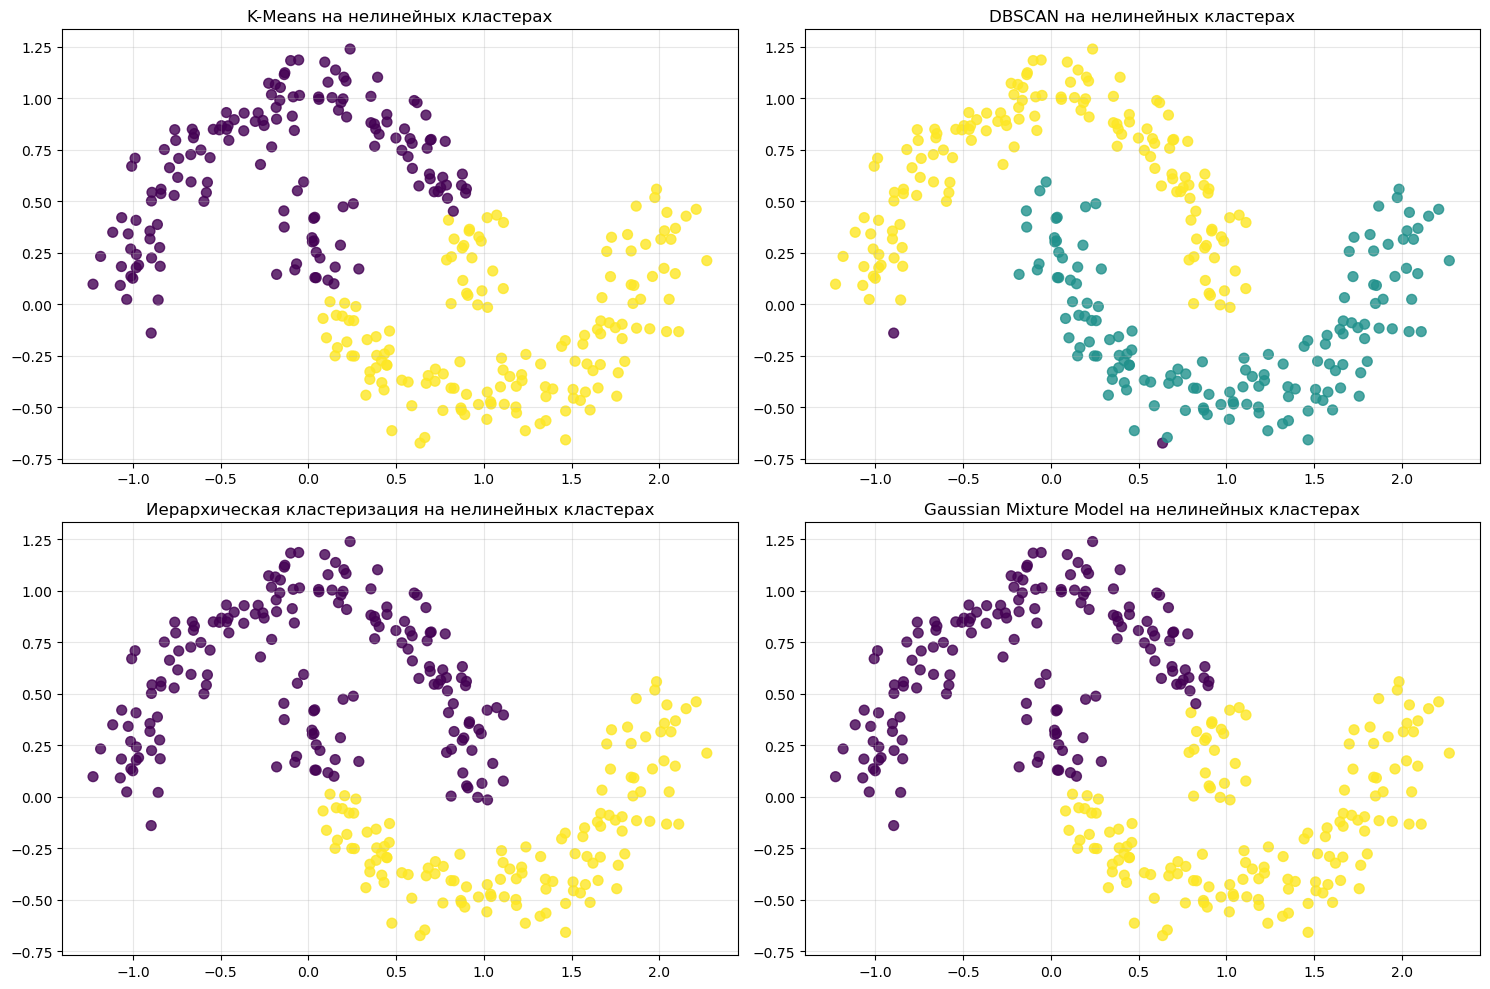

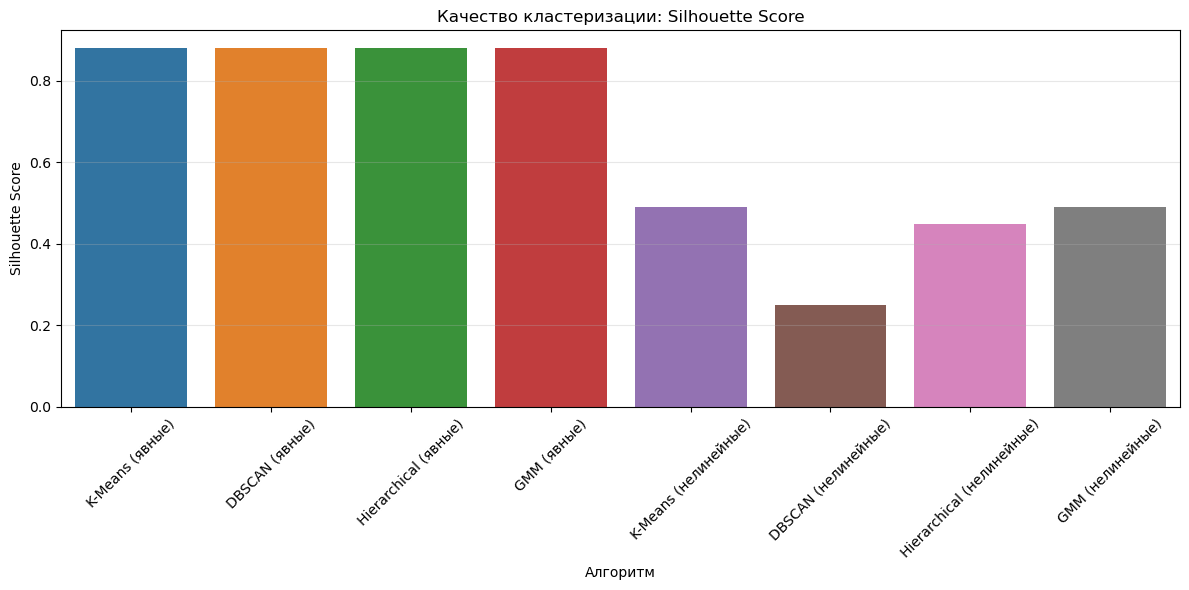

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

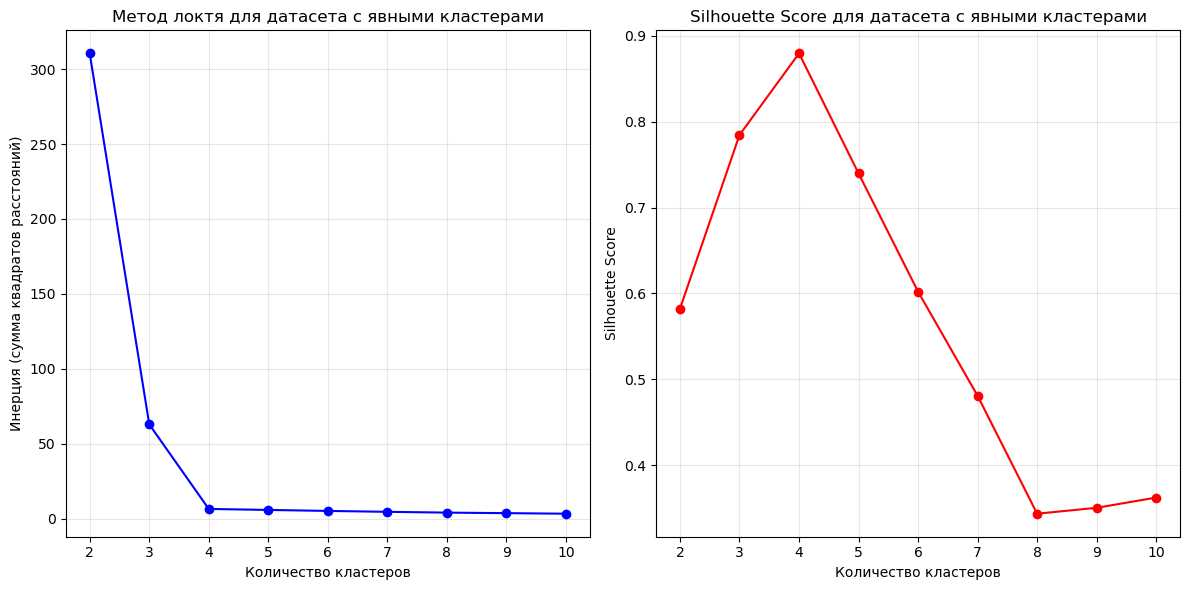

In [104]:
# Создадим синтетические наборы данных для демонстрации
np.random.seed(42)

# Набор 1: данные с явными кластерами
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Набор 2: данные с нелинейно разделимыми кластерами
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

# Стандартизация данных (важно для многих алгоритмов кластеризации)
scaler = StandardScaler()
X_blobs_scaled = scaler.fit_transform(X_blobs)
X_moons_scaled = scaler.fit_transform(X_moons)

# Визуализация исходных данных
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis', s=50, alpha=0.8)
plt.title('Датасет с явными кластерами')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', s=50, alpha=0.8)
plt.title('Датасет с нелинейно разделимыми кластерами')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 1. K-Means кластеризация
kmeans_blobs = KMeans(n_clusters=4, random_state=42)
kmeans_moons = KMeans(n_clusters=2, random_state=42)

y_kmeans_blobs = kmeans_blobs.fit_predict(X_blobs_scaled)
y_kmeans_moons = kmeans_moons.fit_predict(X_moons_scaled)

# 2. DBSCAN кластеризация
dbscan_blobs = DBSCAN(eps=0.3, min_samples=5)
dbscan_moons = DBSCAN(eps=0.3, min_samples=5)

y_dbscan_blobs = dbscan_blobs.fit_predict(X_blobs_scaled)
y_dbscan_moons = dbscan_moons.fit_predict(X_moons_scaled)

# 3. Агломеративная иерархическая кластеризация
hierarchical_blobs = AgglomerativeClustering(n_clusters=4)
hierarchical_moons = AgglomerativeClustering(n_clusters=2)

y_hierarchical_blobs = hierarchical_blobs.fit_predict(X_blobs_scaled)
y_hierarchical_moons = hierarchical_moons.fit_predict(X_moons_scaled)

# 4. Gaussian Mixture Model
gmm_blobs = GaussianMixture(n_components=4, random_state=42)
gmm_moons = GaussianMixture(n_components=2, random_state=42)

y_gmm_blobs = gmm_blobs.fit_predict(X_blobs_scaled)
y_gmm_moons = gmm_moons.fit_predict(X_moons_scaled)

# Функция для визуализации результатов кластеризации
def plot_clusters(X, y_pred, algorithm_name, dataset_name):
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.8)
    plt.title(f'{algorithm_name} на {dataset_name}')
    plt.grid(True, alpha=0.3)

# Визуализация результатов для датасета с явными кластерами
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plot_clusters(X_blobs, y_kmeans_blobs, 'K-Means', 'явных кластерах')

plt.subplot(2, 2, 2)
plot_clusters(X_blobs, y_dbscan_blobs, 'DBSCAN', 'явных кластерах')

plt.subplot(2, 2, 3)
plot_clusters(X_blobs, y_hierarchical_blobs, 'Иерархическая кластеризация', 'явных кластерах')

plt.subplot(2, 2, 4)
plot_clusters(X_blobs, y_gmm_blobs, 'Gaussian Mixture Model', 'явных кластерах')

plt.tight_layout()
plt.show()

# Визуализация результатов для датасета с нелинейно разделимыми кластерами
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plot_clusters(X_moons, y_kmeans_moons, 'K-Means', 'нелинейных кластерах')

plt.subplot(2, 2, 2)
plot_clusters(X_moons, y_dbscan_moons, 'DBSCAN', 'нелинейных кластерах')

plt.subplot(2, 2, 3)
plot_clusters(X_moons, y_hierarchical_moons, 'Иерархическая кластеризация', 'нелинейных кластерах')

plt.subplot(2, 2, 4)
plot_clusters(X_moons, y_gmm_moons, 'Gaussian Mixture Model', 'нелинейных кластерах')

plt.tight_layout()
plt.show()

# Оценка качества кластеризации с помощью silhouette_score
# Для этой метрики значения ближе к 1 указывают на лучшее разделение кластеров
scores = []

# Оценка для датасета с явными кластерами
scores.append(('K-Means (явные)', silhouette_score(X_blobs_scaled, y_kmeans_blobs)))
scores.append(('DBSCAN (явные)', silhouette_score(X_blobs_scaled, y_dbscan_blobs) if len(set(y_dbscan_blobs)) > 1 else 0))
scores.append(('Hierarchical (явные)', silhouette_score(X_blobs_scaled, y_hierarchical_blobs)))
scores.append(('GMM (явные)', silhouette_score(X_blobs_scaled, y_gmm_blobs)))

# Оценка для датасета с нелинейно разделимыми кластерами
scores.append(('K-Means (нелинейные)', silhouette_score(X_moons_scaled, y_kmeans_moons)))
scores.append(('DBSCAN (нелинейные)', silhouette_score(X_moons_scaled, y_dbscan_moons) if len(set(y_dbscan_moons)) > 1 else 0))
scores.append(('Hierarchical (нелинейные)', silhouette_score(X_moons_scaled, y_hierarchical_moons)))
scores.append(('GMM (нелинейные)', silhouette_score(X_moons_scaled, y_gmm_moons)))

# Визуализация оценок
scores_df = pd.DataFrame(scores, columns=['Алгоритм', 'Silhouette Score'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Алгоритм', y='Silhouette Score', data=scores_df)
plt.title('Качество кластеризации: Silhouette Score')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Демонстрация метода локтя для определения оптимального числа кластеров в K-Means
plt.figure(figsize=(12, 6))

# Для датасета с явными кластерами
inertias = []
silhouette_scores = []
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_blobs_scaled)
    inertias.append(kmeans.inertia_)
    if len(set(cluster_labels)) > 1:  # Проверка, что есть более одного кластера
        silhouette_scores.append(silhouette_score(X_blobs_scaled, cluster_labels))
    else:
        silhouette_scores.append(0)

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertias, 'o-', color='blue')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция (сумма квадратов расстояний)')
plt.title('Метод локтя для датасета с явными кластерами')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, 'o-', color='red')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score для датасета с явными кластерами')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Часть 4: Анализ временных рядов: укрощение времени и предсказание будущего


In [105]:
# Импортируем необходимые библиотеки для анализа временных рядов
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

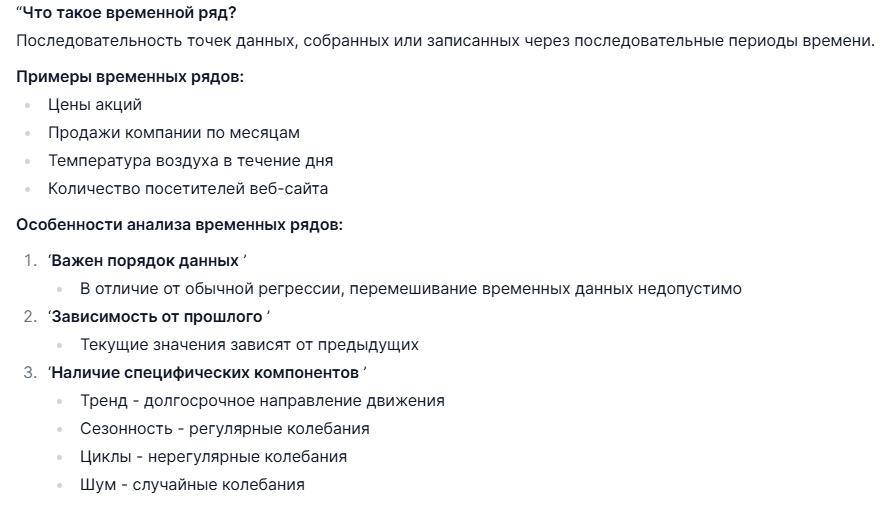

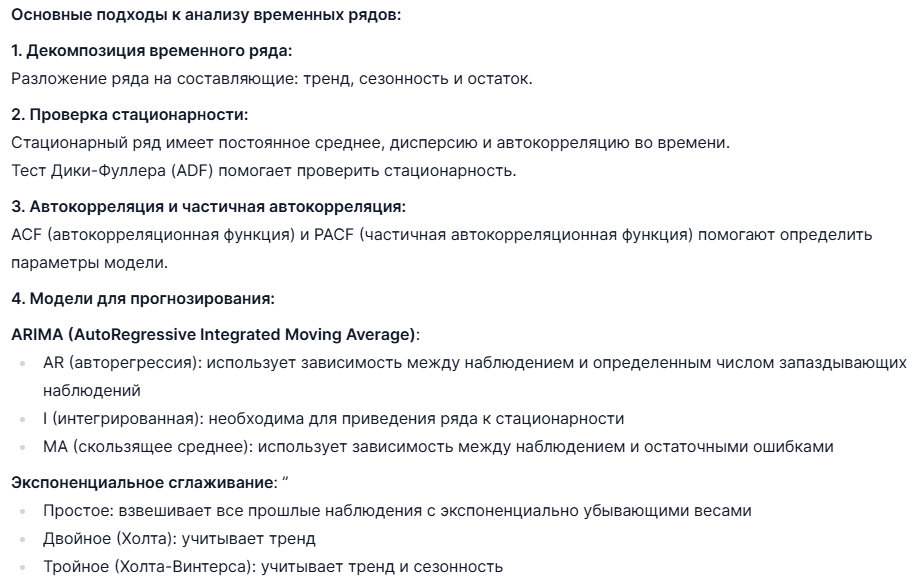

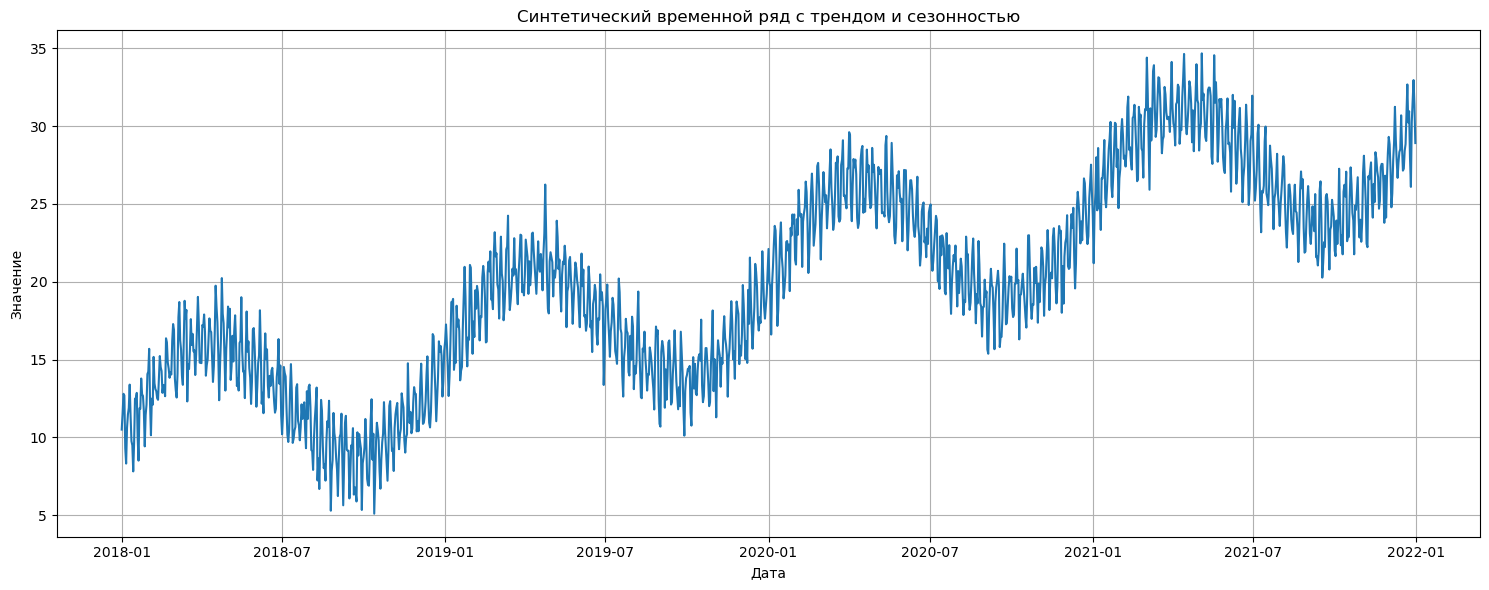

In [106]:
# Создадим синтетический временной ряд для демонстрации
np.random.seed(42)
date_rng = pd.date_range(start='2018-01-01', end='2021-12-31', freq='D')
n = len(date_rng)

# Компоненты временного ряда
# 1. Тренд: линейный рост
trend = np.linspace(10, 30, n)

# 2. Сезонность: годовые циклы
season_cycle = 365.25
seasonality = 5 * np.sin(2 * np.pi * np.arange(n) / season_cycle)
# Добавим недельную сезонность
weekly_cycle = 7
weekly_seasonality = 2 * np.sin(2 * np.pi * np.arange(n) / weekly_cycle)

# 3. Шум
noise = np.random.normal(0, 1, n)

# Создаем временной ряд
y = trend + seasonality + weekly_seasonality + noise

# Создаем DataFrame
ts_df = pd.DataFrame({'date': date_rng, 'value': y})
ts_df.set_index('date', inplace=True)

# Визуализация временного ряда
plt.figure(figsize=(15, 6))
plt.plot(ts_df.index, ts_df['value'])
plt.title('Синтетический временной ряд с трендом и сезонностью')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.tight_layout()
plt.show()


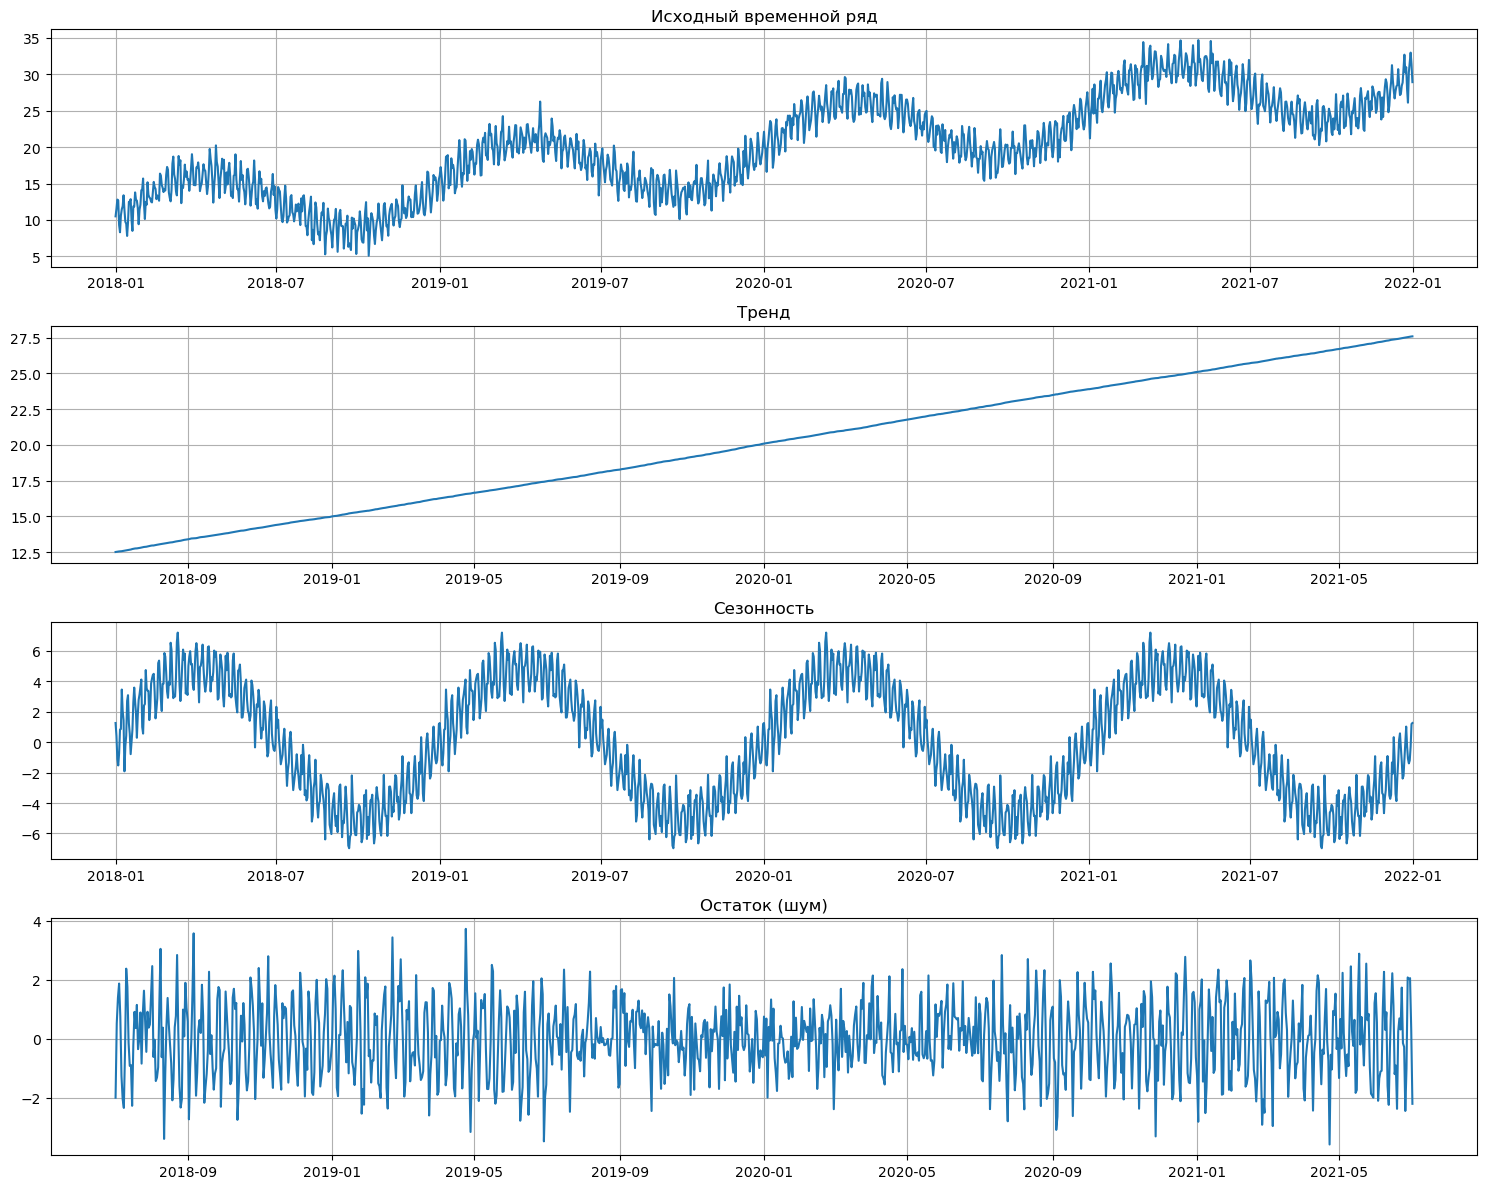

In [107]:
# 1. Декомпозиция временного ряда
# Берем данные с частотой записи День
decomposition = seasonal_decompose(ts_df, model='additive', period=365)

plt.figure(figsize=(15, 12))

plt.subplot(4, 1, 1)
plt.plot(ts_df.index, ts_df['value'])
plt.title('Исходный временной ряд')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Тренд')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Сезонность')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Остаток (шум)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [108]:
# 2. Проверка стационарности с помощью теста Дики-Фуллера
result = adfuller(ts_df['value'].dropna())
print(f'Результаты теста Дики-Фуллера:')
print(f'ADF статистика: {result[0]:.4f}')
print(f'p-значение: {result[1]:.4f}')
print(f'Критические значения:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.4f}')

if result[1] > 0.05:
    print("Ряд не стационарен (нельзя отвергнуть гипотезу о наличии единичного корня)")
else:
    print("Ряд стационарен (можно отвергнуть гипотезу о наличии единичного корня)")

Результаты теста Дики-Фуллера:
ADF статистика: -1.2845
p-значение: 0.6362
Критические значения:
	1%: -3.4349
	5%: -2.8636
	10%: -2.5678
Ряд не стационарен (нельзя отвергнуть гипотезу о наличии единичного корня)


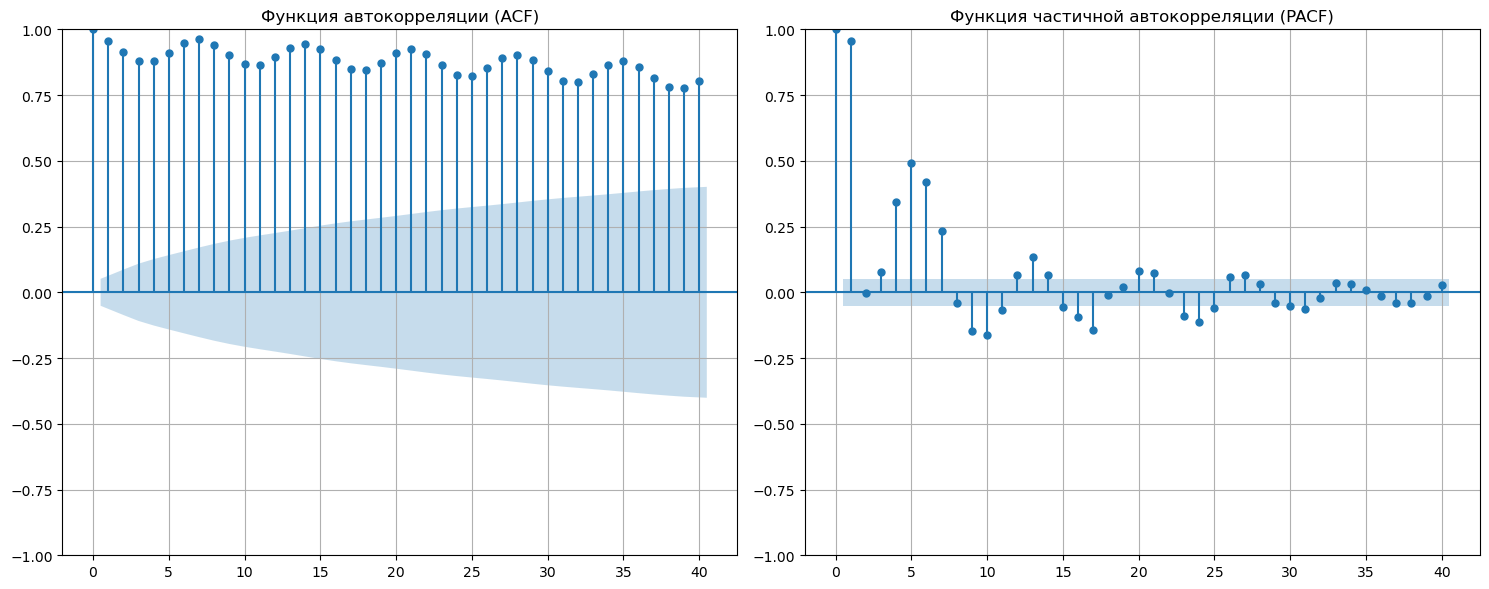

In [109]:
# 3. Анализ автокорреляции для исходного ряда
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plot_acf(ts_df['value'].dropna(), lags=40, ax=plt.gca())
plt.title('Функция автокорреляции (ACF)')
plt.grid(True)

plt.subplot(1, 2, 2)
plot_pacf(ts_df['value'].dropna(), lags=40, ax=plt.gca())
plt.title('Функция частичной автокорреляции (PACF)')
plt.grid(True)

plt.tight_layout()
plt.show()


Результаты теста Дики-Фуллера для дифференцированного ряда:
ADF статистика: -4.7381
p-значение: 0.0001
Дифференцированный ряд стационарен


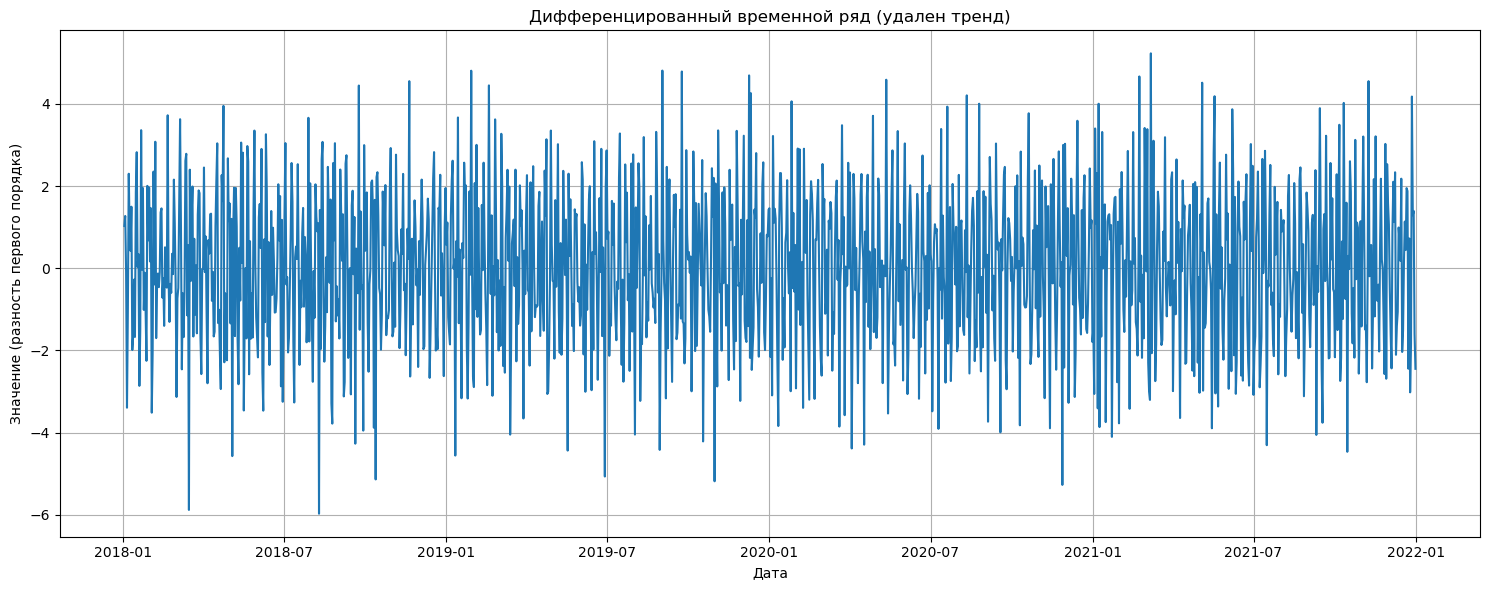

In [110]:
# 4. Дифференцирование временного ряда для приведения к стационарности
# Убираем тренд с помощью разности первого порядка
ts_df['diff1'] = ts_df['value'].diff()

# Проверяем стационарность дифференцированного ряда
result_diff = adfuller(ts_df['diff1'].dropna())
print(f'\nРезультаты теста Дики-Фуллера для дифференцированного ряда:')
print(f'ADF статистика: {result_diff[0]:.4f}')
print(f'p-значение: {result_diff[1]:.4f}')

if result_diff[1] > 0.05:
    print("Дифференцированный ряд не стационарен")
else:
    print("Дифференцированный ряд стационарен")

# Визуализация дифференцированного ряда
plt.figure(figsize=(15, 6))
plt.plot(ts_df.index[1:], ts_df['diff1'].iloc[1:])
plt.title('Дифференцированный временной ряд (удален тренд)')
plt.xlabel('Дата')
plt.ylabel('Значение (разность первого порядка)')
plt.grid(True)
plt.tight_layout()
plt.show()

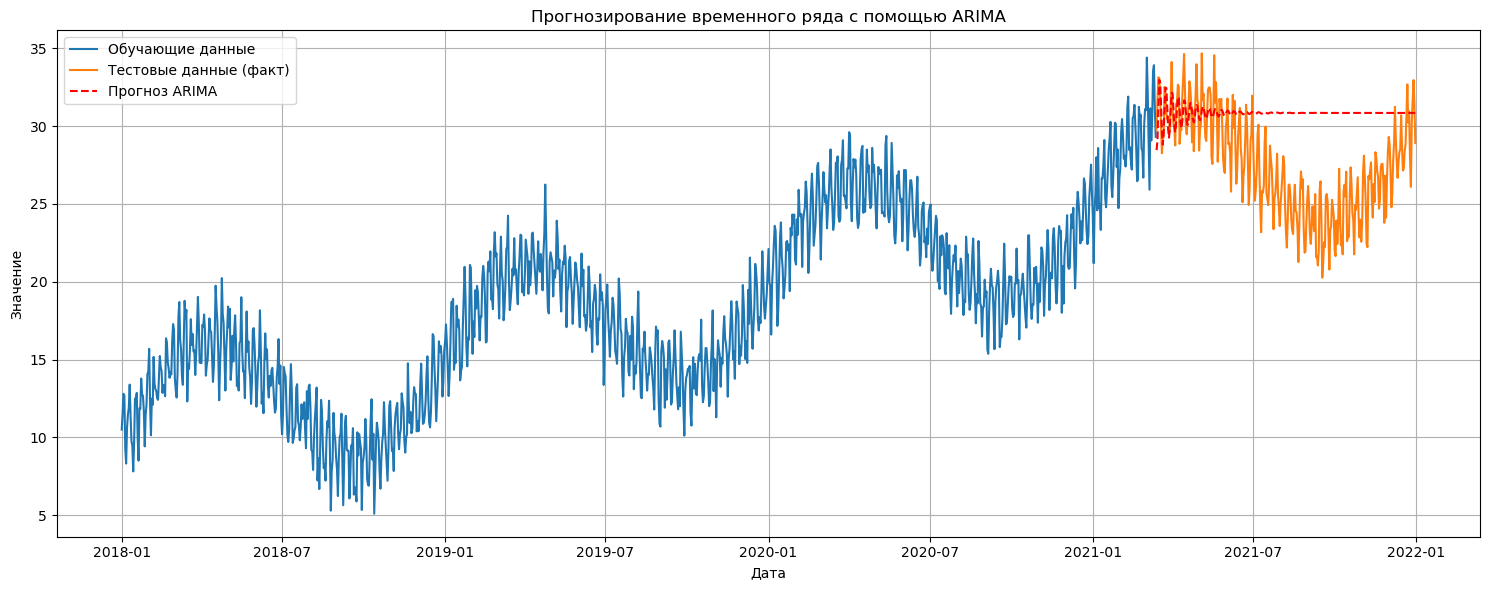

In [113]:
# 5. Модель ARIMA для прогнозирования
# Разделим данные на обучающую и тестовую выборки
train_size = int(len(ts_df) * 0.8)
train, test = ts_df.iloc[:train_size], ts_df.iloc[train_size:]

# Подгоняем модель ARIMA
model = ARIMA(train['value'], order=(5, 1, 1))  # p=5, d=1, q=1
model_fit = model.fit()

# Прогноз на тестовый период
forecast = model_fit.forecast(steps=len(test))

# Визуализация результатов прогнозирования
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['value'], label='Обучающие данные')
plt.plot(test.index, test['value'], label='Тестовые данные (факт)')
plt.plot(test.index, forecast, 'r--', label='Прогноз ARIMA')
plt.title('Прогнозирование временного ряда с помощью ARIMA')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [115]:
# Оценка качества прогноза
mse = mean_squared_error(test['value'], forecast)
rmse = np.sqrt(mse)
print(f'\nКачество прогноза:')
print(f'Среднеквадратичная ошибка (MSE): {mse:.4f}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse:.4f}')
print(f'Средняя абсолютная процентная ошибка (MAPE): {np.mean(np.abs((test["value"] - forecast) / test["value"])) * 100:.2f}%')



Качество прогноза:
Среднеквадратичная ошибка (MSE): 22.1699
Корень из среднеквадратичной ошибки (RMSE): 4.7085
Средняя абсолютная процентная ошибка (MAPE): 15.41%


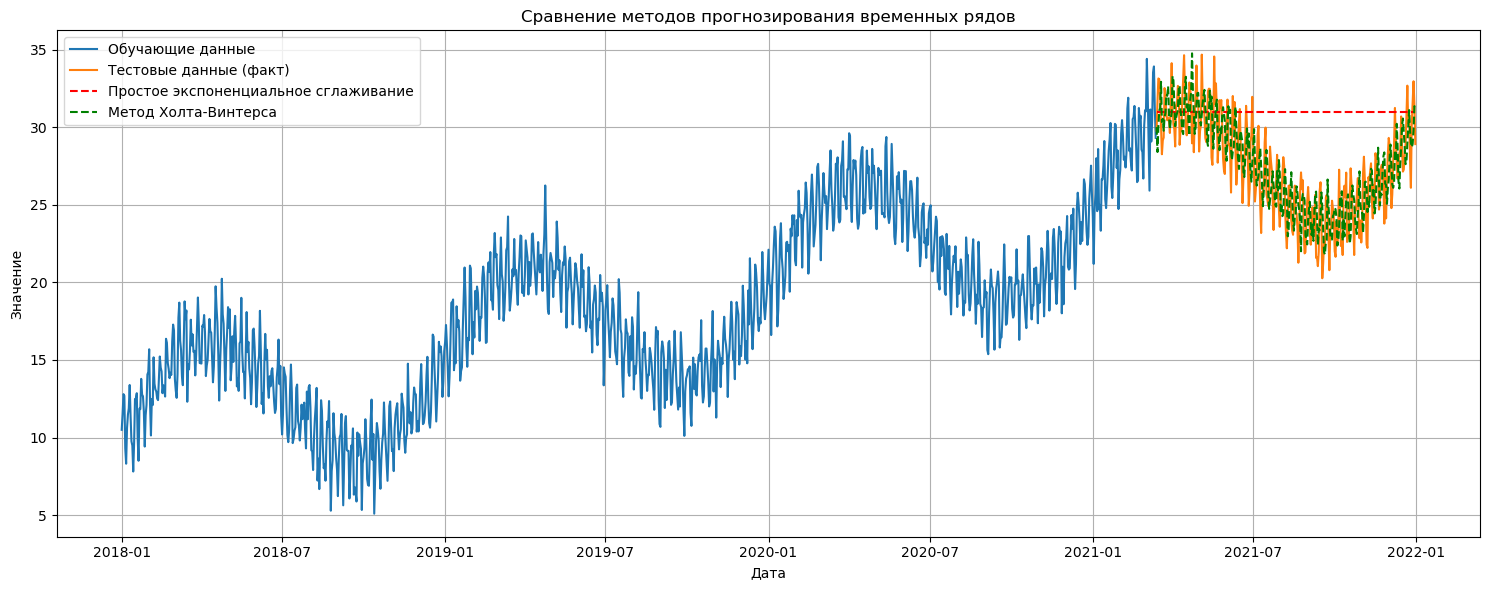


Сравнение методов прогнозирования:
1. ARIMA:
   RMSE: 4.7085
   MAPE: 15.41%
2. Простое экспоненциальное сглаживание:
   RMSE: 4.8077
   MAPE: 15.89%
3. Метод Холта-Винтерса:
   RMSE: 2.2055
   MAPE: 6.95%


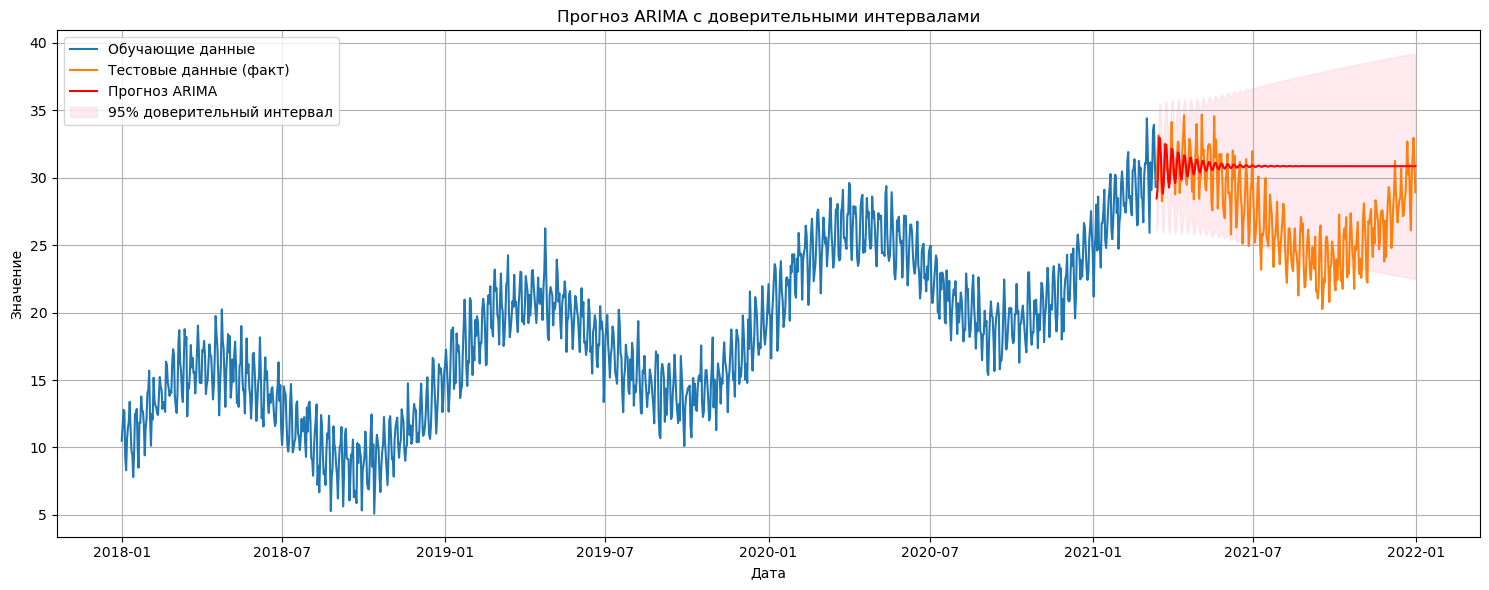

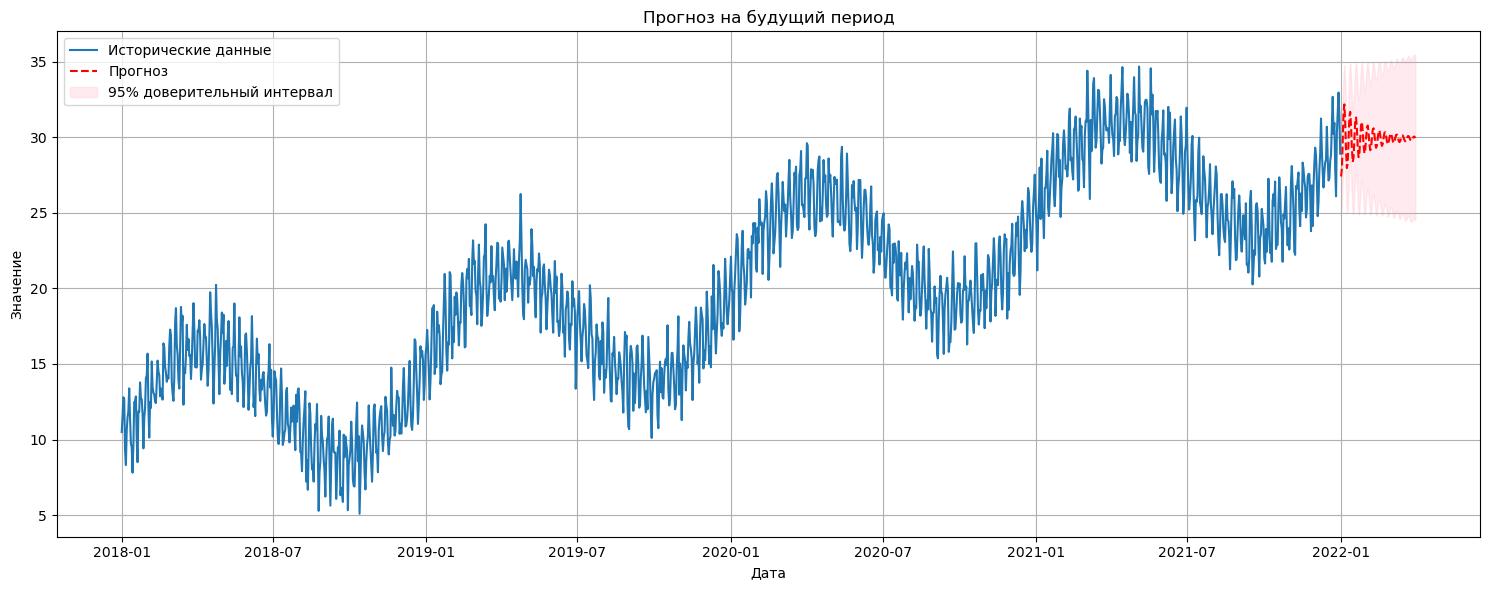

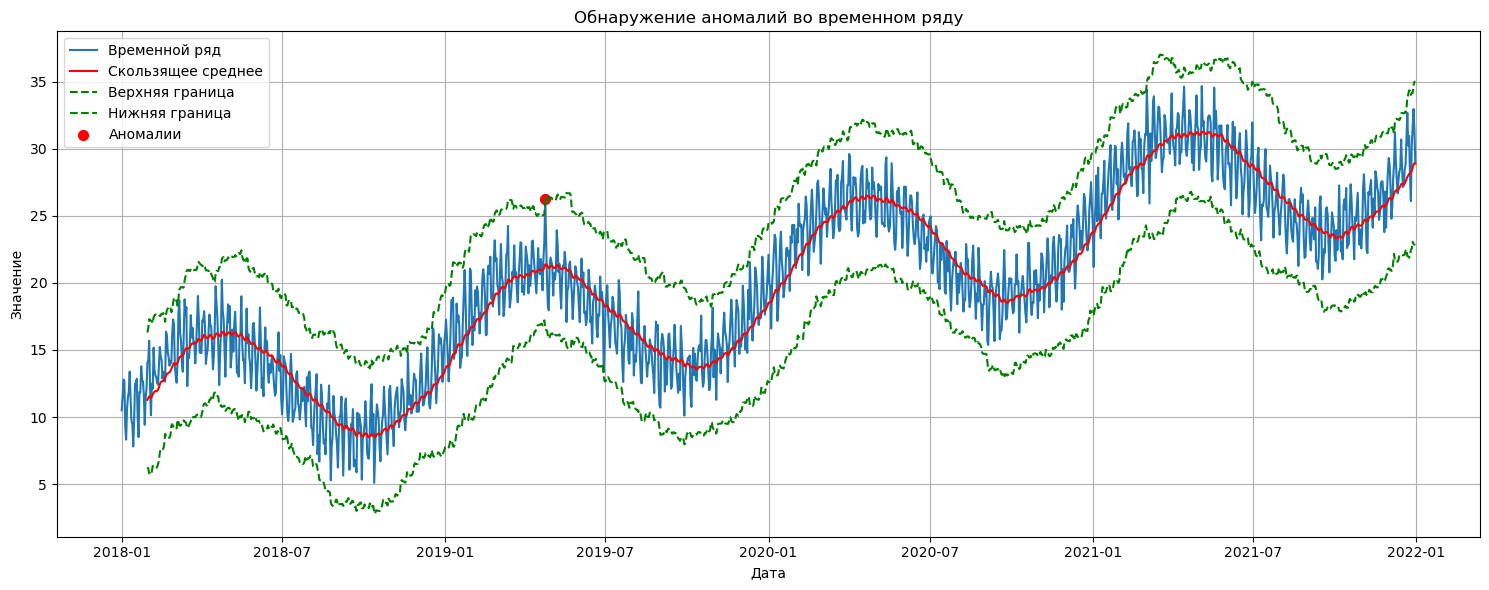


Обнаружено 1 аномалий в временном ряду из 1461 наблюдений


In [116]:
# 6. Простое экспоненциальное сглаживание
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Простое экспоненциальное сглаживание
ses_model = SimpleExpSmoothing(train['value']).fit(smoothing_level=0.3)
ses_forecast = ses_model.forecast(len(test))

# Экспоненциальное сглаживание Холта-Винтерса (с трендом и сезонностью)
hw_model = ExponentialSmoothing(
    train['value'], 
    trend='add',           # аддитивный тренд
    seasonal='add',        # аддитивная сезонность
    seasonal_periods=365   # годовая сезонность
).fit()
hw_forecast = hw_model.forecast(len(test))

# Визуализация результатов
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['value'], label='Обучающие данные')
plt.plot(test.index, test['value'], label='Тестовые данные (факт)')
plt.plot(test.index, ses_forecast, 'r--', label='Простое экспоненциальное сглаживание')
plt.plot(test.index, hw_forecast, 'g--', label='Метод Холта-Винтерса')
plt.title('Сравнение методов прогнозирования временных рядов')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Сравнение метрик качества
mse_ses = mean_squared_error(test['value'], ses_forecast)
rmse_ses = np.sqrt(mse_ses)
mape_ses = np.mean(np.abs((test['value'] - ses_forecast) / test['value'])) * 100

mse_hw = mean_squared_error(test['value'], hw_forecast)
rmse_hw = np.sqrt(mse_hw)
mape_hw = np.mean(np.abs((test['value'] - hw_forecast) / test['value'])) * 100

print('\nСравнение методов прогнозирования:')
print('1. ARIMA:')
print(f'   RMSE: {rmse:.4f}')
print(f'   MAPE: {np.mean(np.abs((test["value"] - forecast) / test["value"])) * 100:.2f}%')

print('2. Простое экспоненциальное сглаживание:')
print(f'   RMSE: {rmse_ses:.4f}')
print(f'   MAPE: {mape_ses:.2f}%')

print('3. Метод Холта-Винтерса:')
print(f'   RMSE: {rmse_hw:.4f}')
print(f'   MAPE: {mape_hw:.2f}%')

# 7. Прогнозирование с учетом доверительных интервалов
# Делаем прогноз ARIMA с доверительными интервалами
pred_ci = model_fit.get_forecast(steps=len(test), alpha=0.05)  # 95% доверительный интервал
pred_mean = pred_ci.predicted_mean
ci = pred_ci.conf_int()

# Визуализация прогноза с доверительными интервалами
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['value'], label='Обучающие данные')
plt.plot(test.index, test['value'], label='Тестовые данные (факт)')
plt.plot(test.index, pred_mean, 'r', label='Прогноз ARIMA')
plt.fill_between(test.index, ci.iloc[:, 0], ci.iloc[:, 1], color='pink', alpha=0.3, label='95% доверительный интервал')
plt.title('Прогноз ARIMA с доверительными интервалами')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Визуализация прогноза на будущий период (за пределами имеющихся данных)
# Предположим, что нам нужен прогноз на следующие 90 дней после окончания нашего ряда
future_steps = 90
future_index = pd.date_range(start=ts_df.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')

# Делаем прогноз с доверительными интервалами
model_full = ARIMA(ts_df['value'], order=(5, 1, 1)).fit()
future_forecast = model_full.get_forecast(steps=future_steps, alpha=0.05)
future_mean = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

# Визуализация прогноза на будущий период
plt.figure(figsize=(15, 6))
plt.plot(ts_df.index, ts_df['value'], label='Исторические данные')
plt.plot(future_index, future_mean, 'r--', label='Прогноз')
plt.fill_between(future_index, future_ci.iloc[:, 0], future_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% доверительный интервал')
plt.title('Прогноз на будущий период')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Обнаружение аномалий во временных рядах
# Простой подход: смотрим на отклонение от скользящего среднего
window_size = 30
ts_df['rolling_mean'] = ts_df['value'].rolling(window=window_size).mean()
ts_df['rolling_std'] = ts_df['value'].rolling(window=window_size).std()

# Определяем аномалии как точки, отстоящие от скользящего среднего более чем на 3 стандартных отклонения
ts_df['upper_bound'] = ts_df['rolling_mean'] + 3 * ts_df['rolling_std']
ts_df['lower_bound'] = ts_df['rolling_mean'] - 3 * ts_df['rolling_std']
ts_df['anomaly'] = (ts_df['value'] > ts_df['upper_bound']) | (ts_df['value'] < ts_df['lower_bound'])

# Визуализация обнаруженных аномалий
plt.figure(figsize=(15, 6))
plt.plot(ts_df.index, ts_df['value'], label='Временной ряд')
plt.plot(ts_df.index, ts_df['rolling_mean'], 'r', label='Скользящее среднее')
plt.plot(ts_df.index, ts_df['upper_bound'], 'g--', label='Верхняя граница')
plt.plot(ts_df.index, ts_df['lower_bound'], 'g--', label='Нижняя граница')
plt.scatter(ts_df[ts_df['anomaly']].index, ts_df[ts_df['anomaly']]['value'], color='red', label='Аномалии', s=50)
plt.title('Обнаружение аномалий во временном ряду')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'\nОбнаружено {ts_df["anomaly"].sum()} аномалий в временном ряду из {len(ts_df)} наблюдений')

# Часть 5: Оценка и автоматизация


In [117]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

## Оценка качества моделей: "А хорошо ли работает наша модель?"


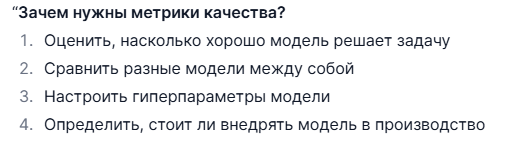

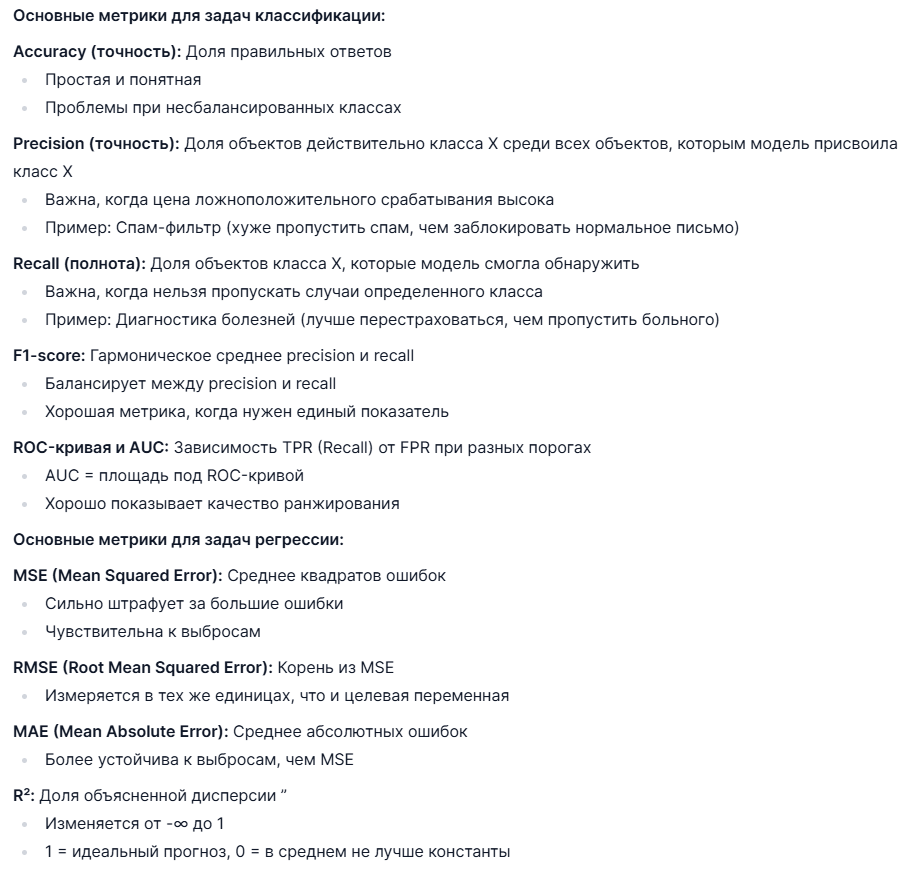

### Немного про базовые метрики

Итак, мы построили модель машинного обучения и обучили ее на некоторых данных... что теперь?

Насколько хорошо работает моя модель? Это полезная модель?
Повысит ли производительность моей модели обучение на большем количестве данных?

Самое важное, что вы можете сделать для правильной оценки своей модели, — это не обучать модель всему набору данных.

Типичное разделение обучения/тестирования обычно заключается в использовании 70% данных для обучения и 30% данных для тестирования.

важно использовать новые данные при оценке нашей модели, чтобы предотвратить вероятность переобучения обучающему набору. Однако иногда бывает полезно оценить нашу модель, когда мы ее строим, чтобы найти лучшие параметры модели, но мы не можем использовать набор тестов для этой оценки, иначе мы в конечном итоге выберем параметры, которые лучше всего работают на тестовые данные, но, возможно, не параметры, которые лучше всего обобщают. Чтобы оценить модель, продолжая строить и настраивать модель, мы создаем третье подмножество данных, известное как набор проверки. Типичное разделение обучения/тестирования/проверки будет заключаться в использовании 60% данных для обучения, 20% данных для проверки и 20% данных для тестирования.

Я также отмечу, что очень важно перетасовать данные перед созданием этих разбиений, чтобы каждое разбиение имело точное представление набора данных.



Когда у вас появилась тестовая выборка достаточно натравить модель на данные и соотнести его решение с заведомо известным правильным решением. Но для того чтобы принимать решение хуже или лучше справляется с работой новая версия алгоритма нам необходима численная метрика его качества.



http://bazhenov.me/blog/2012/07/21/classification-performance-evaluation.html

###### Численная оценка качества алгоритма Accuracy, precision и recall



Перед переходом к самим метрикам необходимо ввести важную концепцию для описания этих метрик в терминах ошибок классификации — confusion matrix (матрица ошибок).


Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов, тогда матрица ошибок классификации будет выглядеть следующим образом:



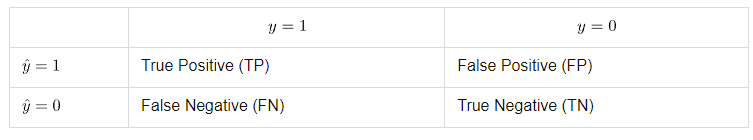

TP  — истино-положительное решение;
TN — истино-отрицательное решение;
FP — ложно-положительное решение;
FN — ложно-отрицательное решение

    1) Истинные положительные результаты — это когда вы предсказываете, что наблюдение принадлежит классу, и оно действительно принадлежит этому классу.
    2) Истинные отрицательные результаты — это когда вы предсказываете, что наблюдение не принадлежит к классу, и оно на самом деле не принадлежит к этому классу.
    3) Ложные  положительные результаты возникают, когда вы предсказываете, что наблюдение относится к классу, хотя на самом деле это не так.
    4) Ложно отрицательные результаты возникают, когда вы предсказываете, что наблюдение не принадлежит к классу, хотя на самом деле оно принадлежит.

###### Accuracy

Интуитивно понятной, очевидной и почти неиспользуемой метрикой является accuracy — доля правильных ответов алгоритма:



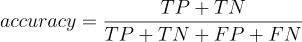

Эта метрика бесполезна в задачах с неравными классами, и это легко показать на примере.



Допустим, мы хотим оценить работу спам-фильтра почты. У нас есть 100 не-спам писем, 90 из которых наш классификатор определил верно (True Negative = 90, False Positive = 10), и 10 спам-писем, 5 из которых классификатор также определил верно (True Positive = 5, False Negative = 5).


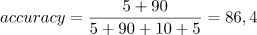

Однако если мы просто будем предсказывать все письма как не-спам, то получим более высокую accuracy:



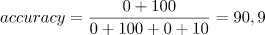

При этом, наша модель совершенно не обладает никакой предсказательной силой, так как изначально мы хотели определять письма со спамом. Преодолеть это нам поможет переход с общей для всех классов метрики к отдельным показателям качества классов.



###### Precision, recall и F-мера


Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики precision (точность) и recall (полнота).



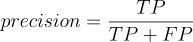

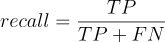

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.



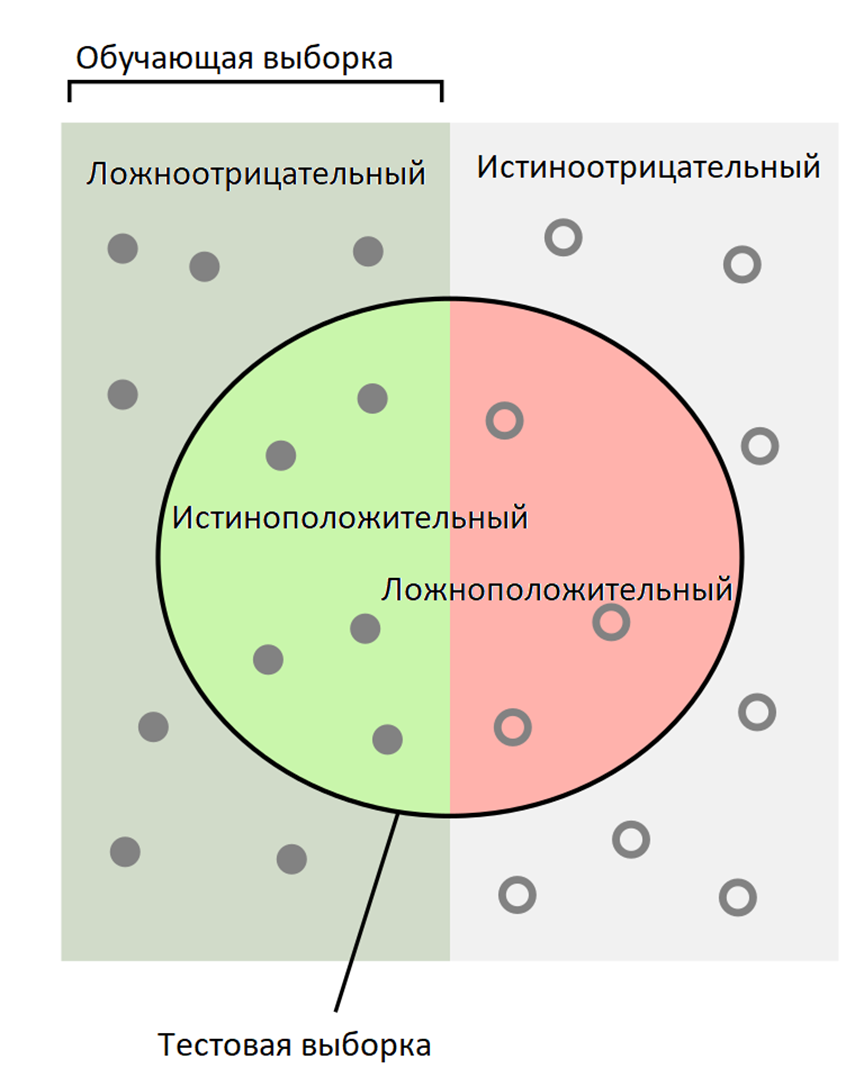

Именно введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.



Как мы отмечали ранее, ошибки классификации бывают двух видов: False Positive и False Negative. В статистике первый вид ошибок называют ошибкой I-го рода, а второй — ошибкой II-го рода.

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.
Часто в реальной практике стоит задача найти оптимальный (для заказчика) баланс между этими двумя метриками. 

Обычно при оптимизации гиперпараметров алгоритма (например, в случае перебора по сетке GridSearchCV ) используется одна метрика, улучшение которой мы и ожидаем увидеть на тестовой выборке.
Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. F-мера (в общем случае $\ F_\beta$) — среднее гармоническое precision и recall :

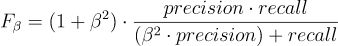

$\beta$ в данном случае определяет вес точности в метрике, и при $\beta = 1$ это среднее гармоническое (с множителем 2, чтобы в случае precision = 1 и recall = 1 иметь $\ F_1 = 1$)


F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.


Давайте рассмотрим практические примеры вычисления и использования метрик:



In [119]:
# Используем датасет Iris для демонстрации
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучим несколько классификаторов
# 1. Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)

# 2. Случайный лес
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)

# Функция для вычисления и отображения основных метрик
def evaluate_classifier(y_true, y_pred, y_prob, model_name):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Precision, Recall, F1-score для каждого класса
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    
    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    
    # Вычисляем метрики с микро- и макро-усреднением
    precision_micro = precision_score(y_true, y_pred, average='micro')
    recall_micro = recall_score(y_true, y_pred, average='micro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    
    # Выводим результаты
    print(f"Оценка модели: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nМетрики для каждого класса:")
    for i in range(len(precision)):
        print(f"Класс {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1 = {f1[i]:.4f}")
    
    print("\nМетрики с усреднением:")
    print(f"Micro-average: Precision = {precision_micro:.4f}, Recall = {recall_micro:.4f}, F1 = {f1_micro:.4f}")
    print(f"Macro-average: Precision = {precision_macro:.4f}, Recall = {recall_macro:.4f}, F1 = {f1_macro:.4f}")
        # Визуализация матрицы ошибок
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')
    plt.title(f'Матрица ошибок для {model_name}')
    plt.tight_layout()
    plt.show()
    
    # Визуализация ROC-кривых для многоклассовой задачи (one-vs-rest)
    plt.figure(figsize=(10, 8))
    
    for i in range(len(iris.target_names)):
        fpr, tpr, _ = roc_curve(y_true == i, y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, 
                 label=f'ROC кривая класса {iris.target_names[i]} (area = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC кривые для {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return accuracy, precision_macro, recall_macro, f1_macro

Оценка модели: Логистическая регрессия
Accuracy: 1.0000

Метрики для каждого класса:
Класс 0: Precision = 1.0000, Recall = 1.0000, F1 = 1.0000
Класс 1: Precision = 1.0000, Recall = 1.0000, F1 = 1.0000
Класс 2: Precision = 1.0000, Recall = 1.0000, F1 = 1.0000

Метрики с усреднением:
Micro-average: Precision = 1.0000, Recall = 1.0000, F1 = 1.0000
Macro-average: Precision = 1.0000, Recall = 1.0000, F1 = 1.0000


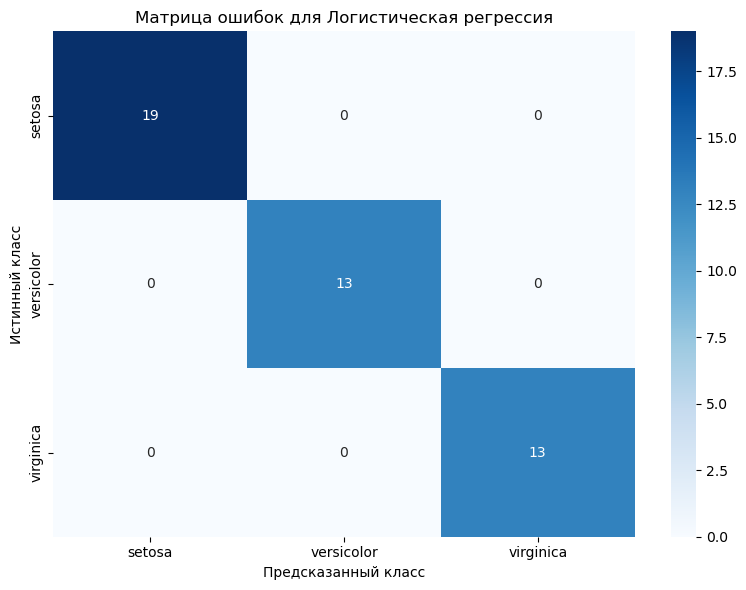

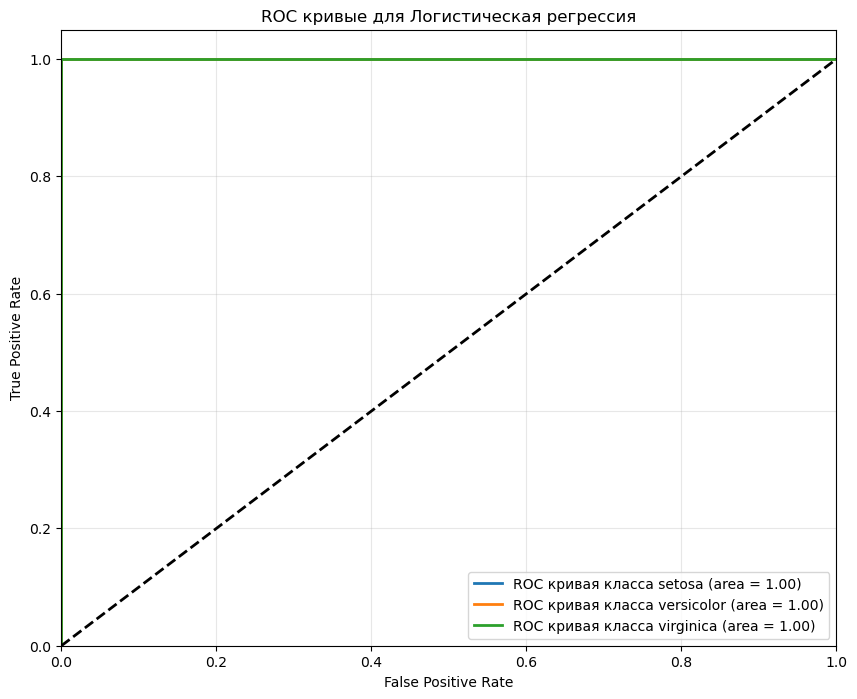


Оценка модели: Случайный лес
Accuracy: 1.0000

Метрики для каждого класса:
Класс 0: Precision = 1.0000, Recall = 1.0000, F1 = 1.0000
Класс 1: Precision = 1.0000, Recall = 1.0000, F1 = 1.0000
Класс 2: Precision = 1.0000, Recall = 1.0000, F1 = 1.0000

Метрики с усреднением:
Micro-average: Precision = 1.0000, Recall = 1.0000, F1 = 1.0000
Macro-average: Precision = 1.0000, Recall = 1.0000, F1 = 1.0000


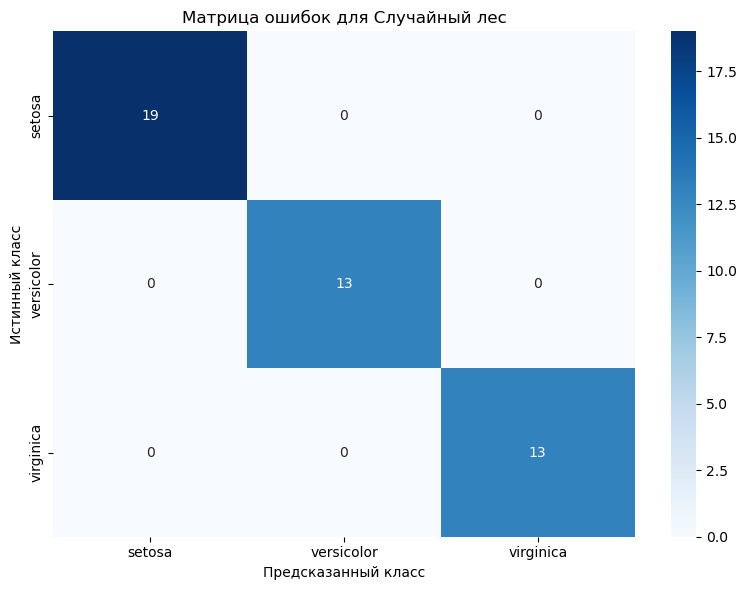

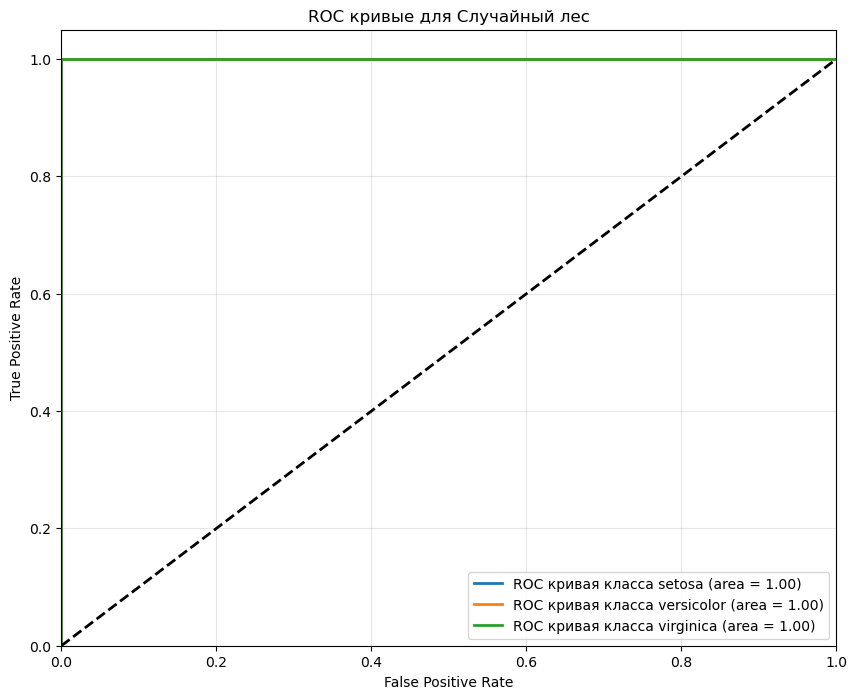

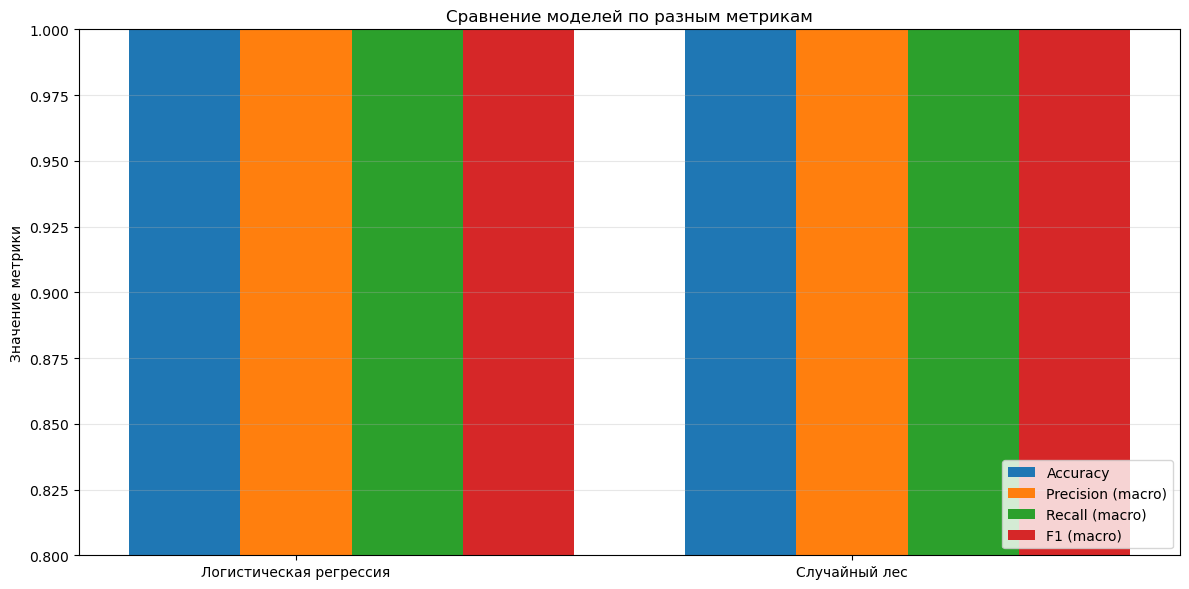

In [123]:
# Оцениваем обе модели
print("="*50)
acc_log, prec_log, rec_log, f1_log = evaluate_classifier(y_test, y_pred_log, y_prob_log, "Логистическая регрессия")
print("\n" + "="*50)
acc_rf, prec_rf, rec_rf, f1_rf = evaluate_classifier(y_test, y_pred_rf, y_prob_rf, "Случайный лес")

# Сравниваем модели на одном графике
models = ['Логистическая регрессия', 'Случайный лес']
metrics = {
    'Accuracy': [acc_log, acc_rf],
    'Precision (macro)': [prec_log, prec_rf],
    'Recall (macro)': [rec_log, rec_rf],
    'F1 (macro)': [f1_log, f1_rf]
}

# Визуализация сравнения моделей
plt.figure(figsize=(12, 6))
x = np.arange(len(models))
width = 0.2
multiplier = 0

for metric_name, metric_values in metrics.items():
    offset = width * multiplier
    plt.bar(x + offset, metric_values, width, label=metric_name)
    multiplier += 1

plt.xticks(x + width, models)
plt.ylim(0.8, 1.0)  # В этом датасете все модели обычно работают хорошо
plt.ylabel('Значение метрики')
plt.title('Сравнение моделей по разным метрикам')
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



### Темы следующего занятия

## 1. Пример кейса как для экзамена

## 2. АвтоML и Автоматизация в ML

## 3. Хранение и сохранение моделей

## 4. MlOPS

## 5.Введение в большие данные

## 6. Скрытые фишки и мастхев знания для DS